In [28]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
import seaborn as sns
import pandas as pd

In [29]:
from spliceformats.readMATS import read_rmats
import logomaker as lm
import tqdm
#for g in tqdm.tqdm(np.unique(all_dfs.Gene)):

In [ ]:
#All French bulk data from https://www.ebi.ac.uk/ena/browser/view/PRJEB28006

## **Read in relevant data and previous analyses**

In [30]:
#Annotations
#Get annotations
import requests
from tqdm import tnrange, tqdm_notebook
def download_file(doi,ext):
    url = 'https://api.datacite.org/dois/'+doi+'/media'
    r = requests.get(url).json()
    netcdf_url = r['data'][0]['attributes']['url']
    r = requests.get(netcdf_url,stream=True)
    #Set file name
    fname = doi.split('/')[-1]+ext
    #Download file with progress bar
    if r.status_code == 403:
        print("File Unavailable")
    if 'content-length' not in r.headers:
        print("Did not get file")
    else:
        with open(fname, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            #pbar = tnrange(int(total_length/1024), unit="B")
            for chunk in r.iter_content(chunk_size=1024):
                if chunk:
                    #pbar.update()
                    f.write(chunk)
        return fname
     

In [31]:
# #Uncomment to download again
# #Human ortholog annotations
# download_file('10.22002/D1.1819','.gz')

# #Panther annotations
# download_file('10.22002/D1.1820','.gz')

# #GO Terms
# download_file('10.22002/D1.1822','.gz')

#!gunzip *D1*.gz

In [32]:
#Read in annotation files
from io import StringIO

hg_ortho_df = pd.read_csv(StringIO(''.join(l.replace('|', '\t') for l in open('D1.1819'))),
            sep="\t",header=None,skiprows=[0,1,2,3])

hg_ortho_df[['XLOC','TCONS']] = hg_ortho_df[13].str.split(expand=True)
hg_ortho_df[['Gene','gi']] = hg_ortho_df[3].str.split(expand=True)
hg_ortho_df['Description']= hg_ortho_df[11]


panther_df = pd.read_csv('D1.1820',
            sep="\t",header=None) #skiprows=[0,1,2,3]



goTerm_df = pd.read_csv('D1.1822',
            sep=" ",header=None) #skiprows=[0,1,2,3]

In [33]:
goTerm_df.head()

,0,1
0,XLOC_000001,NaN
1,XLOC_000002,"GO:0043234,GO:0016020,GO:0016021,GO:0009987,GO..."
2,XLOC_000003,NaN
3,XLOC_000004,"GO:0016787,GO:0006629,GO:0044238,GO:0016788,GO..."
4,XLOC_000005,"GO:0006732,GO:0003824,GO:0016740,GO:0008152,GO..."


In [34]:
#Protein annotations (MSTRG --> XLOC mapping)
c_hem_nr_t2g = pd.read_csv('/home/tchari/clytia_alt_splice/reference/c_hem_nr_t2g.csv')
c_hem_nr_t2g.head()



,0,1,2,3,4,5,6,7,8,9
0,XLOC_019238,MSTRG.1,MSTRG.1.1.p1,MSTRG.1~~MSTRG.1.1.p1,NaN,ORF,type:complete,len:362,"(+),score=61.36",MSTRG.1.1:22-1107(+)
1,MASFYTPRKKTKMADNPGDIEITGYVNYVGPRKTSYFEVYLCDETK...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MSTRG.10,MSTRG.10.1.p1,MSTRG.10~~MSTRG.10.1.p1,NaN,ORF,type:complete,len:191,"(+),score=14.04",MSTRG.10.1:367-939(+),NaN
3,MIEDKITEEKSQKRLKLEKVTLTSNANQQQFDFNKQVIDIIEKSER...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XLOC_004572,MSTRG.100,MSTRG.100.1.p1,MSTRG.100~~MSTRG.100.1.p1,NaN,ORF,type:complete,len:602,"(+),score=115.30,Y_phosphatase|PF00102.24|6.3e...",MSTRG.100.1:124-1929(+)


Previous rmats output

In [35]:
data_path = '/home/tchari/clytia_alt_splice/rmats_out/'
singles = ['p2','mf','m','go','fedsw_mf_2']
comps = ['mf_p2', 'mf_m','p2_go','mf_go','nem_starv_2','fs','neur_fs','neur_icell'] # nem_starv_2
all_data = singles+comps

novels = ['mf_p2_novel','p2_p3_novel','nem_starv_novel']

data_arr = []
for d in all_data:
    p=data_path+'rmats_'+d+'.tar.gz'
    print(p)
    data_arr+=[read_rmats(p)]


novel_arr = []
for d in novels:
    p=data_path+'rmats_'+d+'.tar.gz'
    print(p)
    novel_arr+=[read_rmats(p)]

/home/tchari/clytia_alt_splice/rmats_out/rmats_p2.tar.gz
SE
MXE
RI
A5SS
/home/tchari/clytia_alt_splice/rmats_out/rmats_mf.tar.gz
SE
MXE
RI
A5SS
/home/tchari/clytia_alt_splice/rmats_out/rmats_m.tar.gz
SE
MXE
RI
A5SS
/home/tchari/clytia_alt_splice/rmats_out/rmats_go.tar.gz
SE
MXE
A3SS
RI
A5SS
/home/tchari/clytia_alt_splice/rmats_out/rmats_fedsw_mf_2.tar.gz
SE
MXE
A3SS
RI
A5SS
/home/tchari/clytia_alt_splice/rmats_out/rmats_mf_p2.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_mf_m.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_p2_go.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_mf_go.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_nem_starv_2.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_fs.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_neur_fs.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_neur_icell.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_mf_p2_novel.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_p2_p3_novel.tar.gz
/h

In [36]:
len(data_arr)

13

In [37]:
#Correct psi estimates with shrinkage
from spliceformats.shrinkage import shrink_rMATS

corr_data=[shrink_rMATS(d) for d in data_arr]

## **Analysis of previously annotated splice junction results**

STAR SJ output 

column 0: chromosome

column 1: first base of the intron (1-based)

column 2: last base of the intron (1-based)

column 3: strand (0: undefined, 1: +, 2: -)

column 4: intron motif: 0: non-canonical; 1: GT/AG, 2: CT/AC, 3: GC/AG, 4: CT/GC, 5:
AT/AC, 6: GT/AT

column 5: 0: unannotated, 1: annotated (only if splice junctions database is used)

column 6: number of uniquely mapping reads crossing the junction

column 7: number of multi-mapping reads crossing the junction

column 8: maximum spliced alignment overhang

**ADDED column 9**
column 9: novel site (True/False)

In [38]:
def get_sj_seqs(sj_df,st_minus=10,end_plus=30,upper=True):
    my_list = []
    for i in range(len(sj_df)):
        chrom = sj_df.iloc[i][0]
        start = sj_df.iloc[i][1]
        end = sj_df.iloc[i][2]
    
        my_list += [[chrom,start-st_minus,end+end_plus]] #-10,30

    #Get sequence -10 and +30 around the splice junction ends
    with open("bounds.tsv", "w") as f:
        for row in my_list:
            f.write("\t".join(map(str, row)) + "\n")

    !bedtools getfasta -fi /home/tchari/clytia_alt_splice/reference/clytia_hic_output.fasta -bed bounds.tsv -fo sj_seq.fa.out

    with open('sj_seq.fa.out',) as f:
        raw_seqs = f.readlines()

    !rm bounds.tsv
    !rm sj_seq.fa.out

    seqs = [seq.strip() for seq in raw_seqs if ('#' not in seq) and ('>') not in seq]
    if upper:
        seqs = [i.upper() for i in seqs]
        
    return seqs

# Col 3: 5_SS  : sequence from -10…+20, where +1,+2 is the /GT (or /AT)
# Col 4: 3_SS : sequence from -30…+10, where –2,–1 is the AG/ (or AC/)


# seqs = get_sj_seqs(sub,st_minus=12,end_plus=30)

# counts_mat = lm.alignment_to_matrix([i[0:30]for i in seqs],to_type='information') #or [-60:-19]
# lm.Logo(counts_mat,color_scheme='classic')

In [136]:
import tqdm
import os

In [39]:
ins = pd.read_csv('~/clytia_alt_splice/reference/transdecoder_introns2.bed',header=None,sep='\t')
ins.head()


,0,1,2,3
0,SckGQDu_100;HRSCAF=164,28920,29747,MSTRG.1.1.p1|27692|29819
1,SckGQDu_102;HRSCAF=179,89407,138940,MSTRG.13.1.p1|89244|139738
2,SckGQDu_102;HRSCAF=179,89407,138940,MSTRG.13.1.p2|89244|139738
3,SckGQDu_110;HRSCAF=201,6919,15106,MSTRG.42.1.p1|6844|33003
4,SckGQDu_110;HRSCAF=201,16858,30796,MSTRG.42.1.p1|6844|33003


In [290]:
#REMAKE INTRONS FILE
gtf = pd.read_csv('/home/tchari/clytia_alt_splice/reference/transcripts.fa.transdecoder.genome_geneAndTrans.gtf',delimiter='\t',header=None)
gtf['ID'] = [i.split(' ')[1] for i in gtf[8]]
gtf['ID']= [s.replace('"','') for s in gtf['ID']]
gtf['ID']=[s.replace(';','') for s in gtf['ID']]
gtf.head()

#For each transcript name, get exons
ts = np.unique(gtf['ID'][gtf[2]=='transcript'])

t_gtf = gtf[gtf[2]=='transcript']
e_gtf = gtf[gtf[2]=='exon']

dfs = []
used_ts = []
for t in tqdm.tqdm(ts,desc='Transcript beds'): 
    sub = t_gtf[t_gtf.ID==t]
    #Get bed file for each trancript (just transcript)  
    chrom = sub.iloc[0][0]
    t_start = sub.iloc[0][3]
    t_end = sub.iloc[0][4]-t_start

    my_list = [[chrom,t_end]]
    with open("t_bed.tsv", "w") as f:
            for row in my_list:
                f.write("\t".join(map(str, row)) + "\n")
                
    #Get bed file for just the exons for that transcript
    e_sub = e_gtf[e_gtf.ID==t]
    my_list = []
    for r in range(len(e_sub)):
        chrom = e_sub.iloc[r][0]
        start = e_sub.iloc[r][3]-t_start
        end = e_sub.iloc[r][4]-t_start
    
        my_list += [[chrom,start,end]]

    with open("e_bed.tsv", "w") as f:
            for row in my_list:
                f.write("\t".join(map(str, row)) + "\n")
    
    #bedtools complement and add these to a dataframe/csv
    !bedtools complement -i e_bed.tsv -g t_bed.tsv > i_bed.bed
    #!cat i_bed.bed

    if (os.stat("i_bed.bed").st_size != 0):
        i_bed = pd.read_csv('i_bed.bed',delimiter='\t',header=None)
        i_bed[1] = i_bed[1]+t_start   #intron start would be [1]+1
        i_bed[2] = i_bed[2]+t_start   #intron end would be [2]-1
    
        dfs += [i_bed]
        used_ts += [t]*len(i_bed)
        
    !rm t_bed.tsv e_bed.tsv i_bed.bed

intron_df = pd.concat(dfs)
intron_df[3] = used_ts
intron_df.columns = ['Chr','Start','End','Transcript']
intron_df.head()

Transcript beds:  79%|████████████████████████████████████████████████████████████████████▏                 | 23262/29343 [7:21:31<2:28:59,  1.47s/it]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [295]:
intron_df.to_csv("~/clytia_alt_splice/reference/all_transdecoder_introns_2025.csv",index=None)

In [296]:
intron_df = pd.read_csv("~/clytia_alt_splice/reference/all_transdecoder_introns_2025.csv")
intron_df.head()

,Chr,Start,End,Transcript
0,SckGQDu_100;HRSCAF=164,28920,29747,MSTRG.1.1.p1
1,SckGQDu_110;HRSCAF=201,701226,701413,MSTRG.100.1.p1
2,SckGQDu_110;HRSCAF=201,701525,701647,MSTRG.100.1.p1
3,SckGQDu_110;HRSCAF=201,701684,702013,MSTRG.100.1.p1
4,SckGQDu_110;HRSCAF=201,702085,702184,MSTRG.100.1.p1


In [553]:
#GEt gff3 file for 3UTR and 5UTR, CDS annotations

gff3 = pd.read_csv('/home/tchari/clytia_alt_splice/reference/transcripts.fa.transdecoder.genome.gff3',delimiter='\t', header=None)
gff3.head()

,0,1,2,3,4,5,6,7,8
0,SckGQDu_100;HRSCAF=164,transdecoder,gene,27692,29819,.,-,.,ID=MSTRG.1;Name=ORF%20type%3Acomplete%20len%3A...
1,SckGQDu_100;HRSCAF=164,transdecoder,mRNA,27692,29819,.,-,.,ID=MSTRG.1.1.p1;Parent=MSTRG.1;Name=ORF%20type...
2,SckGQDu_100;HRSCAF=164,transdecoder,five_prime_UTR,29799,29819,.,-,.,ID=MSTRG.1.1.p1.utr5p1;Parent=MSTRG.1.1.p1
3,SckGQDu_100;HRSCAF=164,transdecoder,exon,29747,29819,.,-,.,ID=MSTRG.1.1.p1.exon1;Parent=MSTRG.1.1.p1
4,SckGQDu_100;HRSCAF=164,transdecoder,CDS,29747,29798,.,-,0,ID=cds.MSTRG.1.1.p1;Parent=MSTRG.1.1.p1


In [313]:
# gff3[['MSTRG.21059.1.p3' in i for i in gff3[8]]] #SckGQDu_3;HRSCAF=8	224261	224377 #Intron can be in multiple transcripts with diff CDS etc annotations

In [298]:
#Pos stranded junctions that could be annotated as mapping to known genes, with 10+ uniq reads and 20bp+ overhang
#Found in fed/starved clytia single-cell data (fed cells)

sc_seq_df = pd.read_csv('sc_seq_withChrs_AGGT_ShortInt.csv',index_col=0)
sc_seq_df.head()

#sub[(sub[6]>10) & (sub[8]>20)]

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron,AGGT_Dists,Likely_Recurs
0,SckGQDu_9;HRSCAF=16,537154,537992,AAGGATGAATGGTTAGTATTCAAAACTCATT,TGACCAGTATTGCATTCTGACTTATTTTAGCGTTATGAATG,Ex_Int,GT/AG,False,NaN,False
1,SckGQDu_9;HRSCAF=16,658914,662439,AAGACACAATGGTATGTACCTGATTTAATAA,AAAAATAATCTGAAAATTGAAAAATCTGAGTTTAAACTGTA,Ex_Int,GT/AG,False,NaN,False
2,SckGQDu_9;HRSCAF=16,3022577,3030201,GCCCAATCAAGGTATGTTTTTTTTTGTTTGT,ACAGCTCATATCTTTGTTTTGATTTTGCAGATCGGGGTGAC,Ex_Int,GT/AG,False,NaN,False
3,SckGQDu_9;HRSCAF=16,7927344,8363934,TTGCAACGAAGGCTGTCTTACACACGATAAA,TTTATGATGTTACCAGTGGTTGCAACGAAGGCTGTCTTACA,Ex_Int,GC/AG,False,NaN,False
4,SckGQDu_9;HRSCAF=16,12341047,12345713,AATGCGGCAATGTCCATACTTTGAACCTGAA,CAGACTCTGGGCTTAAAGATAATAATAGAGGGGAAAAGACT,Ex_Int,GT/AG,False,NaN,False


In [548]:
rev_sc_seq_df = pd.read_csv('rev_sc_seq_withChrs_ShortInt.csv',index_col=0)
rev_sc_seq_df.head()

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron
0,SckGQDu_4;HRSCAF=9,168425,187702,CAGATATTAAACTGATAAGAACAGATACTTT,TTTTTTTTTCTTTTTTTTTTTCAAAGCCGTAAAAACAAGT,Ex_Int,CT/AC,False
1,SckGQDu_9;HRSCAF=16,817165,818498,TCACTAACTTTTTTGTACTTACAGGTTGTTT,AGACAATTTCTGGTGAGATGTTCTTCTGGTCAAAATACTC,Ex_Int,CT/AC,False
2,SckGQDu_9;HRSCAF=16,6941306,6941702,TGAGATATTTCTGGATACTTACATCAATTAA,TTGTGCACCCTGGAAGAAAAGCGTAATGATAGATACATAT,Ex_Int,CT/AC,False
3,SckGQDu_9;HRSCAF=16,9068241,9068413,TAAGACTATACTCGTACCATACCTGACAGTC,CTGGGGCATCTAAAGTTGCGGTAAAGAATGAATTGGTATA,Ex_Int,CT/AC,False
4,SckGQDu_9;HRSCAF=16,11447985,11449015,GATCACATGTCCTCTTTTCAACAGGGAATCT,CTTTCTGCTCTGTAAGTATCTTTATCGTCTTTGTTGATGT,Ex_Int,CT/AC,False


In [299]:
#good-looking short introns

inds = [2048,3965,6076,6412,7655,8597,8750,10278,13370,16831,18323,20240,20400,23452,24194]+[24903,24552,24458,23175,22675,20546,20399,20026,19057,18332,17476,17168,17164,12766,5502]


In [300]:
bulk_seq_df = pd.read_csv('bulk_seq_withChrs_AGGT_ShortInt.csv',index_col=0)
bulk_seq_df.head()

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,St_End_Recurs,Short_Intron,AGGT_Dists
0,SckGQDu_9;HRSCAF=16,2553977,2555374,TCCCTTGGAGGGTAAGTTTTACGAGCATCAA,TTTTCTTCACTTTTAACTCGTGGCTGCCAGGATGATCTTTT,Ex_Int,GT/AG,False,False,NaN
1,SckGQDu_13;HRSCAF=20,8777532,8777637,TTAGCTGGCAGGTATGATGTATTTTTATCAA,ATCTAATGCCTCTATTTGCCCTAATTTCAGAAAGCACAGCT,Ex_Int,GT/AG,False,False,NaN
2,SckGQDu_17;HRSCAF=24,3413467,3413646,TTGTCCCTGAAGTCAAATCAGTGCCGGAAGC,GTCAAAGCAGTGCCGGAAGCTGTACCTGAGGTCGAAACAAC,Ex_Int,GT/AG,False,False,19.0
3,SckGQDu_17;HRSCAF=24,3413527,3413646,TTGTCTCTGAAGTCGAAGCAGTGCCGGAAGC,GTCAAAGCAGTGCCGGAAGCTGTACCTGAGGTCGAAACAAC,Ex_Int,GT/AG,False,False,19.0
4,SckGQDu_17;HRSCAF=24,12396707,12398348,TATTGGAACAAGTAAGTATTTACCTTGTGAG,AATGAAAAGGATAACTTAAACTTATTTCAGTCTGCTTACCT,Ex_Int,GT/AG,False,False,NaN


## **Analysis of short introns**

1. Manually look at all candidates
2. Are coding introns alt-spliced? Are their lengths mod3=0
3. How far from stop codon are these introns, in 3' UTRs (within 50bp of the stop or not) → do they trigger NMD
4. Look at mfold structures for >40bp ones https://www.unafold.org/mfold/applications/rna-folding-form.php


In [303]:
sc_seq_df['length'] = (sc_seq_df['End']-sc_seq_df['Start'])+1
sc_seq_df.iloc[inds]

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron,AGGT_Dists,Likely_Recurs,length
2048,SckGQDu_13;HRSCAF=20,3777272,3777294,CAGAATCGTTAGTTTGTTGAAATAAAGTCCC,ATCGTTAGTTTGTTGAAATAAAGTCCCAAGCTTTAGATTGT,Ex_Ex,GT/AG,True,NaN,False,23
3965,SckGQDu_17;HRSCAF=24,8320251,8320284,GCGCCGTAGATGTGAATACTGTGTGTGCAGT,ATACTGTGTGTGCAGTTACCCTCCGGGAAGGGAAATTTCAA,Ex_Ex,GT/AG,True,NaN,False,34
6076,SckGQDu_17;HRSCAF=24,34107220,34107243,TAATATACACTATCTTAGATTATTTTTGAAA,TACACTATCTTAGATTATTTTTGAAATAACCTAGATTCCAA,Ex_Ex,AT/AC,True,NaN,False,24
6412,SckGQDu_22;HRSCAF=46,3266440,3266466,ATGATTTAAAAATGAAATTTAGGTCTACGAA,AAAATGAAATTTAGGTCTACGAAAAATAACATGGCGATATC,Ex_Ex,AT/AC,True,NaN,False,27
7655,SckGQDu_83;HRSCAF=119,10019309,10019331,ATATGGGAAATGTATCTTTTTCACATGACTT,GGGAAATGTATCTTTTTCACATGACTTGAGGTCACACCTTC,Ex_Ex,GT/AG,True,NaN,False,23
8597,SckGQDu_83;HRSCAF=119,24412528,24412557,ACTCTGAAGAGGCTGGGGACGAACCAATTCA,GCTGGGGACGAACCAATTCATTCAGAAGAGAAGGTTATTGT,Ex_Ex,GC/AG,True,NaN,False,30
8750,SckGQDu_83;HRSCAF=119,25721775,25721795,ATTTCAGGGCGGTATGCATGACTCTCAGAAA,TTCAGGGCGGTATGCATGACTCTCAGAAAGGAATGCAACGT,Ex_Ex,GT/AG,True,NaN,False,21
10278,SckGQDu_110;HRSCAF=201,480002,480031,GAACACTGAGAGTGGAGTCAAAGAAGAGAAG,GTGGAGTCAAAGAAGAGAAGGATACCGAAGATGAAATTGAC,Ex_Ex,GT/AG,True,NaN,False,30
13370,SckGQDu_123;HRSCAF=262,11195497,11195517,TTTCAAGATTTGTCTTTTGTAGATTAGGAAA,TCAAGATTTGTCTTTTGTAGATTAGGAAAGAAAGGTGAAGG,Ex_Ex,GT/AG,True,NaN,False,21
16831,SckGQDu_149;HRSCAF=336,8667956,8667977,GGTATAAATGGGTAAAAGTATTTGCTCTGAA,ATAAATGGGTAAAAGTATTTGCTCTGAAAGGTCAAAAAGGC,Ex_Ex,GT/AG,True,NaN,False,22


In [304]:
bulk_seq_df['length'] = (bulk_seq_df['End']-bulk_seq_df['Start'])+1

In [549]:
rev_sc_seq_df['length'] = (rev_sc_seq_df['End']-rev_sc_seq_df['Start'])+1

In [493]:
#get sequences -10/+10 from start/end

# Col 3: 5_SS  : sequence from -10…+20, where +1,+2 is the /GT (or /AT)
# Col 4: 3_SS : sequence from -30…+10, where –2,–1 is the AG/ (or AC/)

sub = sc_seq_df.iloc[inds]
seqs = get_sj_seqs(sub,st_minus=0,end_plus=1) #t_minus=12,end_plus=10

sub['sequence'] =seqs  
# counts_mat = lm.alignment_to_matrix([i[0:30]for i in seqs],to_type='information') #or [-60:-19]
# lm.Logo(counts_mat,color_scheme='classic')

/tmp/ipykernel_2965628/1053824825.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chrom = sj_df.iloc[i][0]
/tmp/ipykernel_2965628/1053824825.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = sj_df.iloc[i][1]
/tmp/ipykernel_2965628/1053824825.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = sj_df.iloc[i][2]
/tmp/ipykernel_2965628/3403738745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

LogomakerError: all elements of sequences must have the same length.

In [ ]:
# counts_mat = lm.alignment_to_matrix([i[-40:]for i in seqs],to_type='information') #or [-60:-19]
# lm.Logo(counts_mat,color_scheme='classic')

In [494]:
sub.head()

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron,AGGT_Dists,Likely_Recurs,length,sequence
2048,SckGQDu_13;HRSCAF=20,3777272,3777294,CAGAATCGTTAGTTTGTTGAAATAAAGTCCC,ATCGTTAGTTTGTTGAAATAAAGTCCCAAGCTTTAGATTGT,Ex_Ex,GT/AG,True,NaN,False,23,TTTGTTGAAATAAAGTCCCAAGC
3965,SckGQDu_17;HRSCAF=24,8320251,8320284,GCGCCGTAGATGTGAATACTGTGTGTGCAGT,ATACTGTGTGTGCAGTTACCCTCCGGGAAGGGAAATTTCAA,Ex_Ex,GT/AG,True,NaN,False,34,TGAATACTGTGTGTGCAGTTACCCTCCGGGAAGG
6076,SckGQDu_17;HRSCAF=24,34107220,34107243,TAATATACACTATCTTAGATTATTTTTGAAA,TACACTATCTTAGATTATTTTTGAAATAACCTAGATTCCAA,Ex_Ex,AT/AC,True,NaN,False,24,TCTTAGATTATTTTTGAAATAACC
6412,SckGQDu_22;HRSCAF=46,3266440,3266466,ATGATTTAAAAATGAAATTTAGGTCTACGAA,AAAATGAAATTTAGGTCTACGAAAAATAACATGGCGATATC,Ex_Ex,AT/AC,True,NaN,False,27,TGAAATTTAGGTCTACGAAAAATAACA
7655,SckGQDu_83;HRSCAF=119,10019309,10019331,ATATGGGAAATGTATCTTTTTCACATGACTT,GGGAAATGTATCTTTTTCACATGACTTGAGGTCACACCTTC,Ex_Ex,GT/AG,True,NaN,False,23,TATCTTTTTCACATGACTTGAGG


In [495]:
sub.to_csv('shortIntron_candidates.csv')

/tmp/ipykernel_2965628/1053824825.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chrom = sj_df.iloc[i][0]
/tmp/ipykernel_2965628/1053824825.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = sj_df.iloc[i][1]
/tmp/ipykernel_2965628/1053824825.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = sj_df.iloc[i][2]
/tmp/ipykernel_2965628/1818156169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

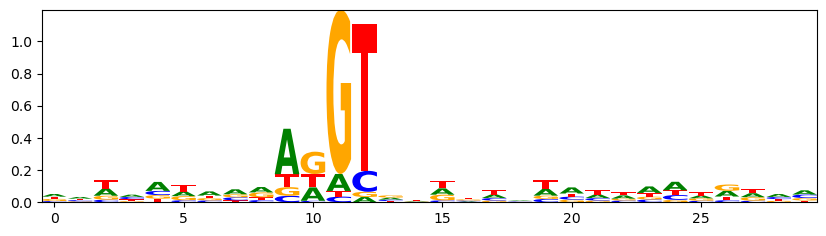

In [517]:
#get sequences -10/+10 from start/end

# Col 3: 5_SS  : sequence from -10…+20, where +1,+2 is the /GT (or /AT)
# Col 4: 3_SS : sequence from -30…+10, where –2,–1 is the AG/ (or AC/)

sub = sc_seq_df.iloc[inds]
seqs = get_sj_seqs(sub,st_minus=12,end_plus=30) #t_minus=12,end_plus=10

sub['sequence'] =seqs  
counts_mat = lm.alignment_to_matrix([i[0:30]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')


/home/tchari/rmats_conda_env/lib/python3.10/site-packages/logomaker/src/matrix.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.26470588 0.26470588 0.17647059 0.47058824 0.26470588 0.35294118
 0.23529412 0.38235294 0.91176471 0.02941176 0.23529412 0.17647059
 0.35294118 0.26470588 0.38235294 0.23529412 0.38235294 0.26470588
 0.20588235 0.29411765 0.23529412 0.35294118 0.47058824 0.44117647
 0.35294118 0.17647059 0.29411765 0.35294118 0.26470588 0.35294118
 0.38235294 0.38235294 0.41176471 0.29411765 0.35294118 0.38235294
 0.38235294 0.35294118 0.32352941 0.29411765]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prob_df.loc[:, :] = vals / vals.sum(axis=1)[:, np.newaxis]
/home/tchari/rmats_conda_env/lib/python3.10/site-packages/logomaker/src/matrix.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. 

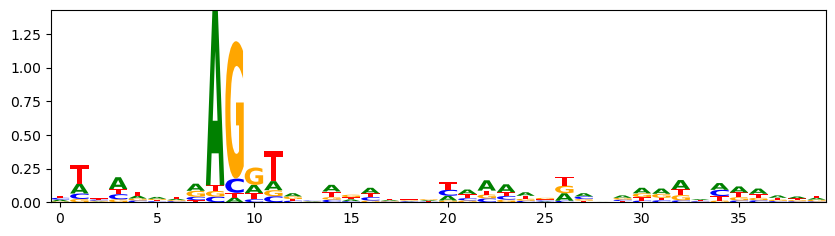

In [518]:
counts_mat = lm.alignment_to_matrix([i[-40:]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

/tmp/ipykernel_2965628/1053824825.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chrom = sj_df.iloc[i][0]
/tmp/ipykernel_2965628/1053824825.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = sj_df.iloc[i][1]
/tmp/ipykernel_2965628/1053824825.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = sj_df.iloc[i][2]
/tmp/ipykernel_2965628/455770538.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

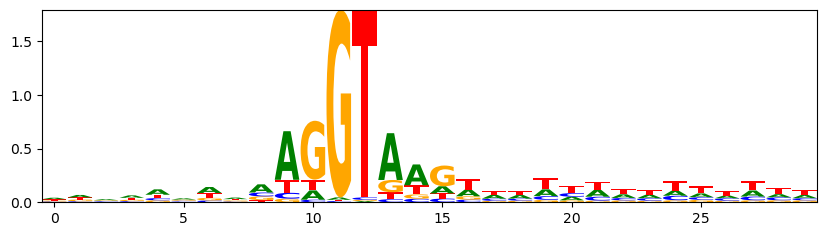

In [145]:
#Once above 80bp

#get sequences -10/+10 from start/end

# Col 3: 5_SS  : sequence from -10…+20, where +1,+2 is the /GT (or /AT)
# Col 4: 3_SS : sequence from -30…+10, where –2,–1 is the AG/ (or AC/)

sub = sc_seq_df[(sc_seq_df.SJ_Type=='Ex_Ex') & (sc_seq_df.length>80) & (sc_seq_df.length<100)]
seqs = get_sj_seqs(sub,st_minus=12,end_plus=10)

sub['sequence'] =seqs  
counts_mat = lm.alignment_to_matrix([i[0:30]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

/home/tchari/rmats_conda_env/lib/python3.10/site-packages/logomaker/src/matrix.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.30379747 0.34810127 0.34177215 0.31012658 0.34177215 0.34810127
 0.28481013 0.33544304 0.3164557  0.26582278 0.20253165 0.24683544
 0.23417722 0.20886076 0.17721519 0.20253165 0.17721519 0.15822785
 0.12658228 0.13924051 0.12025316 0.17721519 0.21518987 0.22151899
 0.12025316 0.09493671 0.23417722 0.12025316 0.98101266 0.00632911
 0.27848101 0.27848101 0.3164557  0.24050633 0.31012658 0.29746835
 0.29746835 0.36075949 0.27848101 0.29746835]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prob_df.loc[:, :] = vals / vals.sum(axis=1)[:, np.newaxis]
/home/tchari/rmats_conda_env/lib/python3.10/site-packages/logomaker/src/matrix.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. 

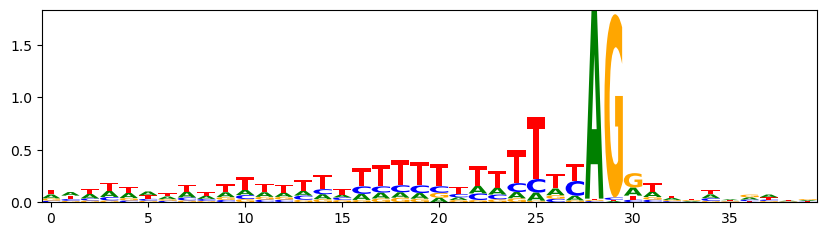

In [146]:
counts_mat = lm.alignment_to_matrix([i[-40:]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

### **Summary plots**

In [315]:
#Validate that all juncs in inds, are in the introns_df

introns_seq_df = sc_seq_df[sc_seq_df.SJ_Type=='Ex_Ex']
real_intron = np.array([False]*len(introns_seq_df))
real_trans = np.array([None]*len(introns_seq_df))

#for each entry, subset introns_df for chr, while sum==0 or i<len(sub_intr_df) (sum += 1 if start>start_int and end<end_int, i+=1 (iloc))
for i in tqdm.tqdm(range(len(introns_seq_df)),desc='Real Introns'):#len(introns_seq_df)
    sub = introns_seq_df.iloc[i]
    chrs = sub.Chr
    st = sub.Start
    end = sub.End

    sub_intron_df = intron_df[intron_df.Chr==chrs]
    sums = 0
    inc = 0

    if (len(sub_intron_df) > 0):
        while ((sums==0) and (inc<len(sub_intron_df))): # ***************** Try 
            sub_df = sub_intron_df.iloc[inc]
            st_int = sub_df.Start
            end_int = sub_df.End
            trans_int = sub_df.Transcript
            
            if ((st==(st_int+1)) and (end==(end_int-1))): # ***************** Try st==(st_int+1) end==(end_int-1) #((st>st_int) and (end<end_int))
                sums +=1 
                real_trans[i] = trans_int
                
            inc += 1
            
        real_intron[i] = (sums!=0)
        
      
real_introns_df = introns_seq_df[real_intron]
real_introns_df['Transcript'] = real_trans[real_intron]
#check if original inds selected remain

Real Introns:  70%|███████████████████████████████████████████████████████████████▌                           | 17068/24418 [1:47:21<53:56,  2.27it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [317]:
real_introns_df.head()

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron,AGGT_Dists,Likely_Recurs,length,Transcript
548,SckGQDu_3;HRSCAF=8,223987,224191,TGCTGAAACTGGTTGGTATATTTTGTTTGTG,ATTCTTTCTCCTTTTTTTTGGATAATCTAGGTCAAAGGATC,Ex_Ex,GT/AG,False,NaN,False,205,MSTRG.21059.2.p1
549,SckGQDu_3;HRSCAF=8,224261,224377,ATCAAATACTGGTAAATGTGCAGCTACATTA,ATTTCCACTCTTTCTTGTTATTTTCATCAGTAATCACTGCA,Ex_Ex,GT/AG,False,NaN,False,117,MSTRG.21059.1.p1
550,SckGQDu_8;HRSCAF=15,355731,356010,ATTTTTCAGTGGTAAGTCATTTTTGAACTTT,TATTCAATTTTCATCGAATTCCTTTTGTAGATGATGTCAAG,Ex_Ex,GT/AG,False,NaN,False,280,MSTRG.23218.1.p1
551,SckGQDu_9;HRSCAF=16,426716,427189,CCGATGTAAAGGTATAATCAATTGATATTTT,AATTTAATCAAGACTATCTTTCTCTTTCAGGCCTATATGGA,Ex_Ex,GT/AG,False,NaN,False,474,MSTRG.24540.1.p1
552,SckGQDu_9;HRSCAF=16,427296,428266,CGCAATCACAGGTAATAATTTGCACCAGGAA,TCTTTCAGCTATCTTGCTATCGTTTTTCAGGTCAGCTTGAC,Ex_Ex,GT/AG,False,NaN,False,971,MSTRG.24540.1.p1


In [318]:
np.sum([i in list(real_introns_df.index) for i in inds])/len(inds)

np.float64(1.0)

In [307]:
# #Checking old AT/AC too
# t2 = [3222,5598,5649,14835,23955]+[415,508,1242,6076,6412,6650,24814,24914]+[382,436,546,1752,6379,6780,11920,13158,13435,16069,20915,24350,24453,24710,24716,24772,24773,24936,24939,24956,24959]
# np.sum([i in list(real_introns_df.index) for i in t2])/len(t2)

In [308]:
# t2 = [3222,5598,5649,14835,23955] #+[415,508,1242,6076,6412,6650,24814,24914]+[382,436,546,1752,6379,6780,11920,13158,13435,16069,20915,24350,24453,24710,24716,24772,24773,24936,24939,24956,24959]
# np.sum([i in list(real_introns_df.index) for i in t2])/len(t2)

In [196]:
real_introns_df.loc[[3222,5598,5649,14835,23955]]

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron,AGGT_Dists,Likely_Recurs,length
3222,SckGQDu_17;HRSCAF=24,477013,477611,CAAACTGTGTGATATCCTTTTCTGAAATTTA,AGAAGACTTTTTCCTTAACAATGGGTGTACATTTGGTTTGG,Ex_Ex,AT/AC,False,NaN,False,598
5598,SckGQDu_17;HRSCAF=24,29856282,29858330,GCTTACGTACAATATCTTTTCAATTAATCTC,TCCTTAACGAACGATTGTGTTGCTATGCACGTTTGACAACC,Ex_Ex,AT/AC,False,NaN,False,2048
5649,SckGQDu_17;HRSCAF=24,30393763,30394194,CTTCTTCAAAAATATCCTTTTCATTATGTTT,CTTAACGAAGAATTGCTCTCATTCGAATACGCATGTGCATG,Ex_Ex,AT/AC,False,NaN,False,431
14835,SckGQDu_148;HRSCAF=334,4789485,4789687,AGAGAAAGAAGATATCCTTTTCAAAATACAT,AATTGTTTTTTCCTTAACTTTGATGTGCACGTATCGACCCT,Ex_Ex,AT/AC,False,NaN,False,202
23955,SckGQDu_198;HRSCAF=491,7391600,7392011,GAGGCCTTAAGATATCTTTTCATTCTATTTG,CCTTGACTGACATTTAATTTTACAATACACGTTGATGCTAA,Ex_Ex,AT/AC,False,NaN,False,411


In [319]:
real_introns_df.to_csv('real_introns_sc_seq.csv',index=None)

In [320]:
test = pd.read_csv('real_introns_sc_seq.csv')
test

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron,AGGT_Dists,Likely_Recurs,length,Transcript
0,SckGQDu_3;HRSCAF=8,223987,224191,TGCTGAAACTGGTTGGTATATTTTGTTTGTG,ATTCTTTCTCCTTTTTTTTGGATAATCTAGGTCAAAGGATC,Ex_Ex,GT/AG,False,NaN,False,205,MSTRG.21059.2.p1
1,SckGQDu_3;HRSCAF=8,224261,224377,ATCAAATACTGGTAAATGTGCAGCTACATTA,ATTTCCACTCTTTCTTGTTATTTTCATCAGTAATCACTGCA,Ex_Ex,GT/AG,False,NaN,False,117,MSTRG.21059.1.p1
2,SckGQDu_8;HRSCAF=15,355731,356010,ATTTTTCAGTGGTAAGTCATTTTTGAACTTT,TATTCAATTTTCATCGAATTCCTTTTGTAGATGATGTCAAG,Ex_Ex,GT/AG,False,NaN,False,280,MSTRG.23218.1.p1
3,SckGQDu_9;HRSCAF=16,426716,427189,CCGATGTAAAGGTATAATCAATTGATATTTT,AATTTAATCAAGACTATCTTTCTCTTTCAGGCCTATATGGA,Ex_Ex,GT/AG,False,NaN,False,474,MSTRG.24540.1.p1
4,SckGQDu_9;HRSCAF=16,427296,428266,CGCAATCACAGGTAATAATTTGCACCAGGAA,TCTTTCAGCTATCTTGCTATCGTTTTTCAGGTCAGCTTGAC,Ex_Ex,GT/AG,False,NaN,False,971,MSTRG.24540.1.p1
...,...,...,...,...,...,...,...,...,...,...,...,...
23385,SckGQDu_198;HRSCAF=491,9794575,9794889,AATCAGCAATTGTAAGTTTTTTTTGCTGCAC,CTAACATGAATGAACTTTTTTTTTTTGTAGGAAAGTCTAAA,Ex_Ex,GT/AG,False,NaN,False,315,MSTRG.18932.2.p1
23386,SckGQDu_198;HRSCAF=491,14942579,14943377,TGTTGACTCTGGTAAGTAGAATTTCCATCTG,AACAGCTACGGTCTTGTTTCTCCATTTCAGACTCAGGCAAA,Ex_Ex,GT/AG,False,NaN,False,799,MSTRG.19205.1.p1
23387,SckGQDu_198;HRSCAF=491,14949300,14949726,CAAACCTACAAGTTAGTATTTTACCCGATTT,CAATATCTTTCTACTATTTATTTATTCTAGACATTCATCCT,Ex_Ex,GT/AG,False,NaN,False,427,MSTRG.19206.1.p1
23388,SckGQDu_198;HRSCAF=491,16022750,16022954,ACGGTTGAGAGGTAAGATAATTCATTCATAC,TAAAACATACTGTTTTTTCTTTTCTTACAGAGGTGTTCAAA,Ex_Ex,GT/AG,False,NaN,False,205,MSTRG.19268.3.p1


In [554]:
#Same for reverse strand

#Validate that all juncs in inds, are in the introns_df

introns_rev_seq_df = rev_sc_seq_df[rev_sc_seq_df.SJ_Type=='Ex_Ex']
real_intron = np.array([False]*len(introns_rev_seq_df))
real_trans = np.array([None]*len(introns_rev_seq_df))

#for each entry, subset introns_df for chr, while sum==0 or i<len(sub_intr_df) (sum += 1 if start>start_int and end<end_int, i+=1 (iloc))
for i in tqdm.tqdm(range(len(introns_rev_seq_df)),desc='Real Introns'):#len(introns_seq_df)
    sub = introns_rev_seq_df.iloc[i]
    chrs = sub.Chr
    st = sub.Start
    end = sub.End

    sub_intron_df = intron_df[intron_df.Chr==chrs]
    sums = 0
    inc = 0

    if (len(sub_intron_df) > 0):
        while ((sums==0) and (inc<len(sub_intron_df))): # ***************** Try 
            sub_df = sub_intron_df.iloc[inc]
            st_int = sub_df.Start
            end_int = sub_df.End
            trans_int = sub_df.Transcript
            
            if ((st==(st_int+1)) and (end==(end_int-1))): # ***************** Try st==(st_int+1) end==(end_int-1) #((st>st_int) and (end<end_int))
                sums +=1 
                real_trans[i] = trans_int
                
            inc += 1
            
        real_intron[i] = (sums!=0)
        
      
real_rev_introns_df = introns_rev_seq_df[real_intron]
real_rev_introns_df['Transcript'] = real_trans[real_intron]
#check if original inds selected remain

real_rev_introns_df.to_csv('real_rev_introns_sc_seq.csv',index=None)

rev_test = pd.read_csv('real_rev_introns_sc_seq.csv')
rev_test.head()

Real Introns:  33%|█████████████████████▉                                            | 7722/23188 [49:05<1:59:40,  2.15it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [499]:
t=gff3[gff3[2]=='exon']
np.median(t[4]-t[3])

np.float64(140.0)

456.0


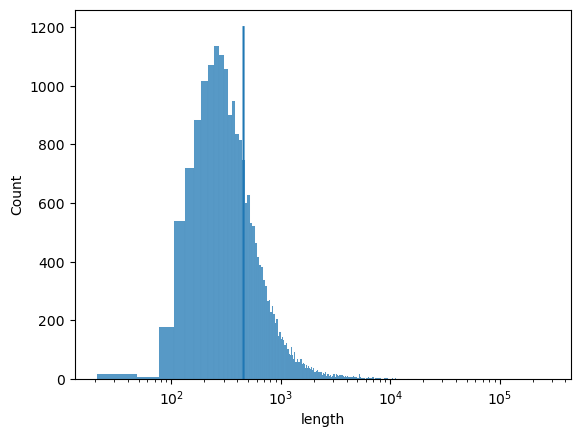

In [323]:
sns.histplot(test['length'],bins=10000)
plt.xscale('log')
plt.plot([np.median(test['length'])]*1200,list(range(1200)))
print(np.median(test['length']))

373.0


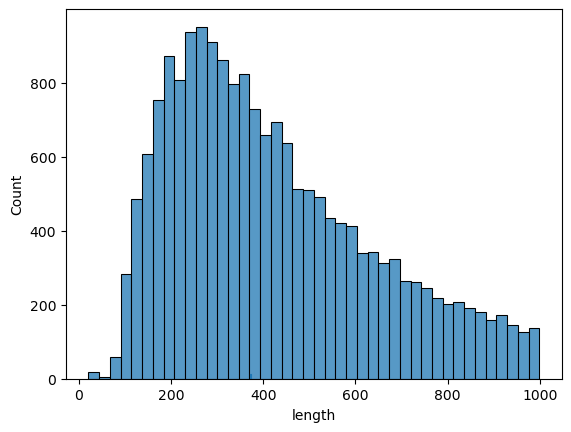

In [325]:
sns.histplot(test['length'][test['length']<1000])
#plt.xscale('log')
plt.plot([np.median(test['length'][test['length']<1000])]*12,list(range(12)))
print(np.median(test['length'][test['length']<1000]))

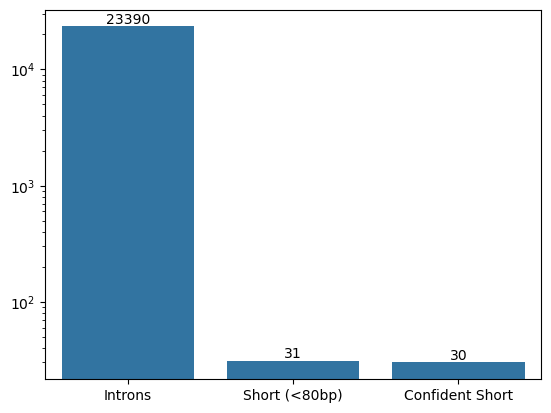

In [324]:
g=sns.barplot(x=['Introns','Short (<80bp)','Confident Short'],y=[len(test['length']),len(test[test.length<80]),len(inds)])
for i in g.containers:
    g.bar_label(i,)
plt.yscale('log')

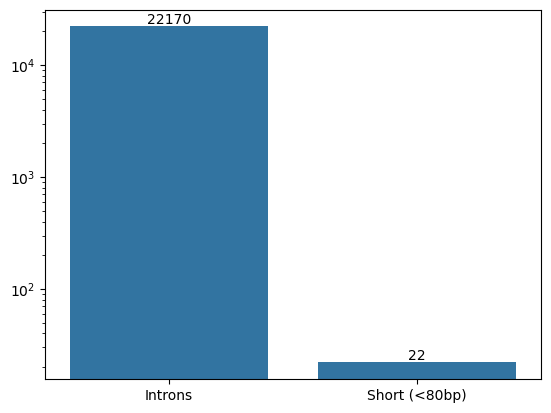

In [555]:
g=sns.barplot(x=['Introns','Short (<80bp)'],y=[len(rev_test['length']),len(rev_test[rev_test.length<80])])
for i in g.containers:
    g.bar_label(i,)
plt.yscale('log')

In [557]:
# rev_test[rev_test.length<80]

/tmp/ipykernel_2965628/1053824825.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chrom = sj_df.iloc[i][0]
/tmp/ipykernel_2965628/1053824825.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = sj_df.iloc[i][1]
/tmp/ipykernel_2965628/1053824825.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = sj_df.iloc[i][2]
/tmp/ipykernel_2965628/2359817707.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

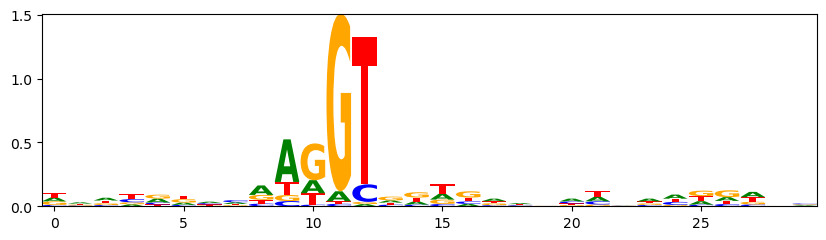

In [192]:
#Once above 80bp

#get sequences -10/+10 from start/end

# Col 3: 5_SS  : sequence from -10…+20, where +1,+2 is the /GT (or /AT)
# Col 4: 3_SS : sequence from -30…+10, where –2,–1 is the AG/ (or AC/)

sub = test[test.length<80]
seqs = get_sj_seqs(sub,st_minus=12,end_plus=10)

sub['sequence'] =seqs  
counts_mat = lm.alignment_to_matrix([i[0:30]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

/home/tchari/rmats_conda_env/lib/python3.10/site-packages/logomaker/src/matrix.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33766234 0.28571429 0.25974026 0.23376623 0.33766234 0.24675325
 0.37662338 0.44155844 0.20779221 0.27272727 0.31168831 0.2987013
 0.27272727 0.2987013  0.31168831 0.25974026 0.24675325 0.24675325
 0.23376623 0.2987013  0.18181818 0.27272727 0.18181818 0.28571429
 0.18181818 0.27272727 0.22077922 0.50649351 0.96103896 0.01298701
 0.15584416 0.12987013 0.23376623 0.19480519 0.2987013  0.15584416
 0.33766234 0.28571429 0.15584416 0.37662338]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prob_df.loc[:, :] = vals / vals.sum(axis=1)[:, np.newaxis]
/home/tchari/rmats_conda_env/lib/python3.10/site-packages/logomaker/src/matrix.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. V

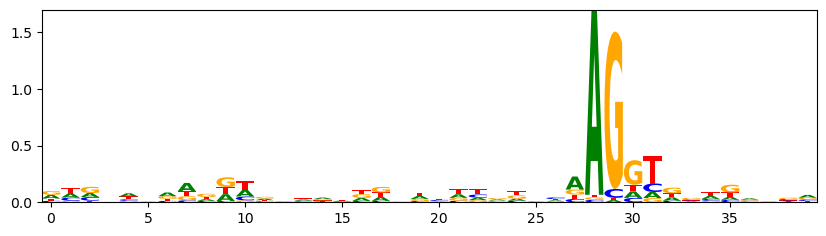

In [193]:
counts_mat = lm.alignment_to_matrix([i[-40:]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

In [558]:
gff3_rev = gff3[gff3[6] =='-']

In [327]:
gff3 = gff3[gff3[6] =='+']

In [368]:
short_sub = test[test.length<80] #sc_seq_df.iloc[inds]
valid_cats = []
dist_from_stop = []
for i in range(len(short_sub)):
    found_3 = False
    found_5 = False
    
    df = short_sub.iloc[i]
    c = df.Chr
    st = df.Start.astype(int)
    end = df.End.astype(int)
    trans = df.Transcript

    t_filt = [trans[0:trans.index('.p')] in i for i in gff3[8]]
    sub_gff3 = gff3[(gff3[2]=='three_prime_UTR') & t_filt] #(gff3[0]==c)

    if len(sub_gff3) > 0:
        sts = np.array(sub_gff3[3])
        ends = np.array(sub_gff3[4])

        if (st in list(ends+1)) & (end in list(sts-1)):
            valid_cats += ['3UTR']
            found_3 = True

            cds = gff3[(gff3[2]=='CDS') & t_filt]
            dist_from_stop += [(st - cds.iloc[-1][4])+1]
            #print('FOUND')
            
                
    if not found_3:
        sub_gff3 = gff3[(gff3[2]=='five_prime_UTR') & t_filt]
        if len(sub_gff3) > 0:
            sts = np.array(sub_gff3[3])
            ends = np.array(sub_gff3[4])

            if (st in list(ends+1)) & (end in list(sts-1)):
                valid_cats += ['5UTR']
                found_5 = True
                dist_from_stop += [np.nan]
    

    if ((not found_3) and (not found_5)): #CDS
        valid_cats += ['Exon-Coding']
        dist_from_stop += [np.nan]


    

short_sub['Loc'] =   valid_cats
short_sub['dist_from_stop'] = dist_from_stop

/tmp/ipykernel_2965628/4136054894.py:15: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  sub_gff3 = gff3[(gff3[2]=='three_prime_UTR') & t_filt] #(gff3[0]==c)
/tmp/ipykernel_2965628/4136054894.py:25: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  cds = gff3[(gff3[2]=='CDS') & t_filt]
/tmp/ipykernel_2965628/4136054894.py:31: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  sub_gff3 = gff3[(gff3[2]=='five_prime_UTR') & t_filt]
/tmp/ipy

In [560]:
short_sub_rev = rev_test[rev_test.length<80] #sc_seq_df.iloc[inds]
valid_cats = []
dist_from_stop = []
for i in range(len(short_sub_rev)):
    found_3 = False
    found_5 = False
    
    df = short_sub_rev.iloc[i]
    c = df.Chr
    st = df.Start.astype(int)
    end = df.End.astype(int)
    trans = df.Transcript

    t_filt = [trans[0:trans.index('.p')] in i for i in gff3_rev[8]]
    sub_gff3 = gff3_rev[(gff3_rev[2]=='three_prime_UTR') & t_filt] #(gff3[0]==c)

    if len(sub_gff3) > 0:
        sts = np.array(sub_gff3[3])
        ends = np.array(sub_gff3[4])

        if (st in list(ends+1)) & (end in list(sts-1)):
            valid_cats += ['3UTR']
            found_3 = True

            cds = gff3_rev[(gff3_rev[2]=='CDS') & t_filt]
            dist_from_stop += [(cds.iloc[-1][3]-end)+1]
            #print('FOUND')
            
                
    if not found_3:
        sub_gff3 = gff3_rev[(gff3_rev[2]=='five_prime_UTR') & t_filt]
        if len(sub_gff3) > 0:
            sts = np.array(sub_gff3[3])
            ends = np.array(sub_gff3[4])

            if (st in list(ends+1)) & (end in list(sts-1)):
                valid_cats += ['5UTR']
                found_5 = True
                dist_from_stop += [np.nan]
    

    if ((not found_3) and (not found_5)): #CDS
        valid_cats += ['Exon-Coding']
        dist_from_stop += [np.nan]


    

short_sub_rev['Loc'] =   valid_cats
short_sub_rev['dist_from_stop'] = dist_from_stop

/tmp/ipykernel_2965628/3421746786.py:15: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  sub_gff3 = gff3_rev[(gff3_rev[2]=='three_prime_UTR') & t_filt] #(gff3[0]==c)
/tmp/ipykernel_2965628/3421746786.py:31: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  sub_gff3 = gff3_rev[(gff3_rev[2]=='five_prime_UTR') & t_filt]
/tmp/ipykernel_2965628/3421746786.py:25: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  cds = gff3_rev[(gff3_rev[2]=='

In [571]:
short_sub_rev[short_sub_rev.Loc=='5UTR']

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron,length,Transcript,Loc,dist_from_stop


In [572]:
short_sub[short_sub.Loc=='5UTR']

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron,AGGT_Dists,Likely_Recurs,length,Transcript,Loc,dist_from_stop
2788,SckGQDu_17;HRSCAF=24,2062883,2062961,AACTATTAAAGGTAAGAAATTACAGTTCTAC,TTGTAATTTTTATTGTTTTATATTTGATAGCTTCGAAGGTA,Ex_Ex,GT/AG,False,NaN,False,79,MSTRG.14002.1.p1,5UTR,NaN
7931,SckGQDu_83;HRSCAF=119,25721775,25721795,ATTTCAGGGCGGTATGCATGACTCTCAGAAA,TTCAGGGCGGTATGCATGACTCTCAGAAAGGAATGCAACGT,Ex_Ex,GT/AG,True,NaN,False,21,MSTRG.22881.1.p2,5UTR,NaN


In [542]:
mf_inclev_genes = [i for i in short_sub[short_sub.Loc=='3UTR'].Transcript]
mf_inclev_xlocs = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['2'].isin(mf_inclev_genes)])

In [547]:
c_hem_nr_t2g['8'][c_hem_nr_t2g['2'].isin(mf_inclev_genes)].iloc[2]

'(+),score=52.58,zf-C2H2|PF00096.23|5.7e-06,zf-C2H2|PF00096.23|1.1e-06,zf-C2H2|PF00096.23|2.1e-06,zf-C2H2|PF00096.23|5.9e-06,zf-C2H2_4|PF13894.3|0.00066,zf-C2H2_4|PF13894.3|0.00052,zf-C2H2_4|PF13894.3|0.0015,zf-C2H2_4|PF13894.3|0.00024,zf-C2H2_4|PF13894.3|0.00025,zf-C2H2_4|PF13894.3|0.0012,zf-C2H2_4|PF13894.3|0.00027,zf-C2H2_4|PF13894.3|0.00025,zf-met|PF12874.4|0.033,zf-met|PF12874.4|0.017,zf-C2H2_6|PF13912.3|0.091,zf-C2H2_6|PF13912.3|0.0019'

In [543]:
hg_ortho_df[hg_ortho_df.XLOC.isin(mf_inclev_xlocs)] 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,XLOC,TCONS,Gene,gi,Description
3255,8846,7722,Hs,RRM1 gi,4506749,ref,NP_001024.1,gi,4506749,ref,...,g.29644 ORF TCONS_00020980,g.29644 TCONS_00020980,m.29644 type:complete len:815 (+) TCONS_000209...,1:1,2519.0,XLOC_011766,TCONS_00020980,RRM1,gi,ribonucleoside-diphosphate reductase large su...
5156,13857,26396,Hs,NOB1 gi,7661532,ref,NP_054781.1,gi,7661532,ref,...,g.90607 ORF TCONS_00073006,g.90607 TCONS_00073006,m.90607 type:complete len:420 (+) TCONS_000730...,1:1,10421.0,XLOC_045281,TCONS_00073006,NOB1,gi,RNA-binding protein NOB1 [Homo sapiens]


In [441]:
#Do the same for all other introns

rest_sub = test[test.length>80] #sc_seq_df.iloc[inds]
valid_cats = []
dist_from_stop = []
for i in tqdm.tqdm(range(len(rest_sub))):
    found_3 = False
    found_5 = False
    
    df = rest_sub.iloc[i]
    c = df.Chr
    st = df.Start.astype(int)
    end = df.End.astype(int)
    trans = df.Transcript

    t_filt = [trans[0:trans.index('.p')-2] in i for i in gff3[8]]
    sub_gff3 = gff3[(gff3[2]=='three_prime_UTR') & t_filt] #(gff3[0]==c)

    cds_gff3 = gff3[(gff3[2]=='CDS') & t_filt]

    if len(sub_gff3) > 0:
        sts = np.array(sub_gff3[3])
        ends = np.array(sub_gff3[4])

        sts_cds = np.array(cds_gff3[3])
        ends_cds = np.array(cds_gff3[4])

        if (st in list(ends+1)) & (end in list(sts-1)): 

            if (st not in list(ends_cds+1)) & (end not in list(sts_cds-1)) & (list(sts-1).index(end)==len(sts)-1): # ********** AND NOT ALSO MATCHED IN CDS ********
                valid_cats += ['3UTR']
                found_3 = True
    
                found_trans = sub_gff3[8].iloc[list(ends+1).index(st)].split(';')[1].replace('Parent=','')             
    
                t2_filt = [found_trans in i for i in gff3[8]]
                cds = gff3[(gff3[2]=='CDS') & t2_filt]
                dist_from_stop += [(st - cds.iloc[-1][4])+1]
            elif (st not in list(ends_cds+1)) & (end not in list(sts_cds-1)):
                valid_cats += ['3UTR_upstream']
                found_3 = True
    
                found_trans = sub_gff3[8].iloc[list(ends+1).index(st)].split(';')[1].replace('Parent=','')             
    
                t2_filt = [found_trans in i for i in gff3[8]]
                cds = gff3[(gff3[2]=='CDS') & t2_filt]
                dist_from_stop += [(st - cds.iloc[-1][4])+1] #not really useful for these
                
            #print('FOUND')
            
                
    if not found_3:
        sub_gff3 = gff3[(gff3[2]=='five_prime_UTR') & t_filt]
        if len(sub_gff3) > 0:
            sts = np.array(sub_gff3[3])
            ends = np.array(sub_gff3[4])

            sts_cds = np.array(cds_gff3[3])
            ends_cds = np.array(cds_gff3[4])

            if (st in list(ends+1)) & (end in list(sts-1)):
                if (st not in list(ends_cds+1)) & (end not in list(sts_cds-1)):
                    valid_cats += ['5UTR']
                    found_5 = True
                    dist_from_stop += [np.nan]
    

    if ((not found_3) and (not found_5)): #CDS
        valid_cats += ['Exon-Coding']
        dist_from_stop += [np.nan]


    

rest_sub['Loc'] =  valid_cats
rest_sub['dist_from_stop'] = dist_from_stop

  0%|                                                                                             | 0/23357 [00:00<?, ?it/s]/tmp/ipykernel_2965628/296523019.py:17: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  sub_gff3 = gff3[(gff3[2]=='three_prime_UTR') & t_filt] #(gff3[0]==c)
/tmp/ipykernel_2965628/296523019.py:19: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  cds_gff3 = gff3[(gff3[2]=='CDS') & t_filt]
/tmp/ipykernel_2965628/296523019.py:53: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the obj

In [442]:
rest_sub.head()

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron,AGGT_Dists,Likely_Recurs,length,Transcript,Loc,dist_from_stop
0,SckGQDu_3;HRSCAF=8,223987,224191,TGCTGAAACTGGTTGGTATATTTTGTTTGTG,ATTCTTTCTCCTTTTTTTTGGATAATCTAGGTCAAAGGATC,Ex_Ex,GT/AG,False,NaN,False,205,MSTRG.21059.2.p1,Exon-Coding,NaN
1,SckGQDu_3;HRSCAF=8,224261,224377,ATCAAATACTGGTAAATGTGCAGCTACATTA,ATTTCCACTCTTTCTTGTTATTTTCATCAGTAATCACTGCA,Ex_Ex,GT/AG,False,NaN,False,117,MSTRG.21059.1.p1,Exon-Coding,NaN
2,SckGQDu_8;HRSCAF=15,355731,356010,ATTTTTCAGTGGTAAGTCATTTTTGAACTTT,TATTCAATTTTCATCGAATTCCTTTTGTAGATGATGTCAAG,Ex_Ex,GT/AG,False,NaN,False,280,MSTRG.23218.1.p1,Exon-Coding,NaN
3,SckGQDu_9;HRSCAF=16,426716,427189,CCGATGTAAAGGTATAATCAATTGATATTTT,AATTTAATCAAGACTATCTTTCTCTTTCAGGCCTATATGGA,Ex_Ex,GT/AG,False,NaN,False,474,MSTRG.24540.1.p1,Exon-Coding,NaN
4,SckGQDu_9;HRSCAF=16,427296,428266,CGCAATCACAGGTAATAATTTGCACCAGGAA,TCTTTCAGCTATCTTGCTATCGTTTTTCAGGTCAGCTTGAC,Ex_Ex,GT/AG,False,NaN,False,971,MSTRG.24540.1.p1,Exon-Coding,NaN


In [443]:
rest_sub[(rest_sub.dist_from_stop>50) & (rest_sub.Loc=='3UTR')]

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,Short_Intron,AGGT_Dists,Likely_Recurs,length,Transcript,Loc,dist_from_stop
2200,SckGQDu_13;HRSCAF=20,17198427,17208995,TATATTTGAAAGTTTTAAGTATATTGTCTTC,ATATATTTTATATGCTATTATATTTGAAAGTTTTAAGTATA,Ex_Ex,GT/AG,False,NaN,False,10569,MSTRG.5347.9.p1,3UTR,188.0
2516,SckGQDu_13;HRSCAF=20,24251907,24252158,TAGTGTTAGAGGTTAGTACCTTTTTGTATCT,GAAATATTGATTTTTTTTTCTCTTATTTAGATGTTTCACCA,Ex_Ex,GT/AG,False,NaN,False,252,MSTRG.5802.2.p1,3UTR,229.0
4138,SckGQDu_17;HRSCAF=24,19715051,19715370,GAAGAATACAGGTGCCAAATAAACGGCCCCC,CCCCCCCCCCGTTTATTTGGCACCTAAGAGTAAATGCACAA,Ex_Ex,GT/AG,False,NaN,False,320,MSTRG.15220.2.p1,3UTR,213.0
4356,SckGQDu_17;HRSCAF=24,22057580,22057739,GATTAGTACTAGTAATCGTATGGTTTGGAGT,TAATTGCACGACAAAACATACGATTCCGAGGTAATCGTCAG,Ex_Ex,GT/AG,False,NaN,False,160,MSTRG.15381.2.p1,3UTR,199.0
4557,SckGQDu_17;HRSCAF=24,25540384,25550201,TATCGATTGAGGTTTTCCGAAATCAAAATAC,AATTACATGGGGTAATGTCAATCGGCTGAGATTTTCCGAAA,Ex_Ex,GT/AG,False,NaN,False,9818,MSTRG.15609.1.p1,3UTR,152.0
5498,SckGQDu_17;HRSCAF=24,35735960,35736120,TATAAAATAAGGTGAGCGATAAGTTACTCTT,TAATAATCATATTTCAATCTAATTTTTAAGGTAACAGCCCG,Ex_Ex,GT/AG,False,NaN,False,161,MSTRG.16353.1.p1,3UTR,134.0
6586,SckGQDu_83;HRSCAF=119,5408166,5409456,TCTAGCATACAGTCGGGTGTTTAAGATAAAA,TTCTTTATACCTCCATGCTTCTAGCTGCAGATTTTTTATGT,Ex_Ex,GT/AG,False,NaN,False,1291,MSTRG.21545.1.p1,3UTR,399.0
6905,SckGQDu_83;HRSCAF=119,10632905,10634124,TGAATTCTAAGGTCGGTGTTTTTTACACTTT,TTGCCAAAAGTGTAAAATACACTGACTAAGAAATTCTTCTT,Ex_Ex,GT/AG,False,NaN,False,1220,MSTRG.21845.1.p1,3UTR,122.0
7140,SckGQDu_83;HRSCAF=119,14739754,14741896,GAAAAATACAGGTATTTATATACTATTTCAA,TGAAAGTTTTTAAAAAATATTTCTTTACAGGCGCAAATCGA,Ex_Ex,GT/AG,False,NaN,False,2143,MSTRG.22079.1.p1,3UTR,147.0
7449,SckGQDu_83;HRSCAF=119,19353165,19353470,ACGAATGGGATGTTACTCTTAGGTGCCAAAT,TACCCCCCCCCCGTTTATTTGGCACCTAAGAGTAATGAATT,Ex_Ex,GT/AG,False,NaN,False,306,MSTRG.22421.3.p1,3UTR,352.0


In [444]:

t_filt = ['MSTRG.3960' in i for i in gff3[8]] 
sub_gff3 = gff3[t_filt] #SckGQDu_9;HRSCAF=16	8609791	8611611
sub_gff3

,0,1,2,3,4,5,6,7,8
461479,SckGQDu_123;HRSCAF=262,transdecoder,gene,25413250,25422673,.,+,.,ID=MSTRG.3960;Name=ORF%20type%3Acomplete%20len...
461480,SckGQDu_123;HRSCAF=262,transdecoder,mRNA,25413250,25422673,.,+,.,ID=MSTRG.3960.1.p2;Parent=MSTRG.3960;Name=ORF%...
461481,SckGQDu_123;HRSCAF=262,transdecoder,five_prime_UTR,25413250,25413382,.,+,.,ID=MSTRG.3960.1.p2.utr5p1;Parent=MSTRG.3960.1.p2
461482,SckGQDu_123;HRSCAF=262,transdecoder,five_prime_UTR,25419581,25419880,.,+,.,ID=MSTRG.3960.1.p2.utr5p2;Parent=MSTRG.3960.1.p2
461483,SckGQDu_123;HRSCAF=262,transdecoder,exon,25413250,25413382,.,+,.,ID=MSTRG.3960.1.p2.exon1;Parent=MSTRG.3960.1.p2
461484,SckGQDu_123;HRSCAF=262,transdecoder,exon,25419581,25422673,.,+,.,ID=MSTRG.3960.1.p2.exon2;Parent=MSTRG.3960.1.p2
461485,SckGQDu_123;HRSCAF=262,transdecoder,CDS,25419881,25420645,.,+,0,ID=cds.MSTRG.3960.1.p2;Parent=MSTRG.3960.1.p2
461486,SckGQDu_123;HRSCAF=262,transdecoder,three_prime_UTR,25420646,25422673,.,+,.,ID=MSTRG.3960.1.p2.utr3p1;Parent=MSTRG.3960.1.p2
461487,SckGQDu_123;HRSCAF=262,transdecoder,mRNA,25413250,25422673,.,+,.,ID=MSTRG.3960.1.p1;Parent=MSTRG.3960;Name=ORF%...
461488,SckGQDu_123;HRSCAF=262,transdecoder,five_prime_UTR,25413250,25413382,.,+,.,ID=MSTRG.3960.1.p1.utr5p1;Parent=MSTRG.3960.1.p1


In [430]:
t_filt = ['MSTRG.4397.1.p1' in i for i in gff3[8]] #WHY IS CDS LABELED IN ONE BUT NOT THE OTHER???? , SckGQDu_13;HRSCAF=20	1270340	1270640
sub_gff3 = gff3[t_filt] #SckGQDu_9;HRSCAF=16	8609791	8611611
sub_gff3

,0,1,2,3,4,5,6,7,8
475709,SckGQDu_13;HRSCAF=20,transdecoder,mRNA,1264174,1271946,.,+,.,ID=MSTRG.4397.1.p1;Parent=MSTRG.4397;Name=ORF%...
475710,SckGQDu_13;HRSCAF=20,transdecoder,five_prime_UTR,1264174,1264239,.,+,.,ID=MSTRG.4397.1.p1.utr5p1;Parent=MSTRG.4397.1.p1
475711,SckGQDu_13;HRSCAF=20,transdecoder,exon,1264174,1266009,.,+,.,ID=MSTRG.4397.1.p1.exon1;Parent=MSTRG.4397.1.p1
475712,SckGQDu_13;HRSCAF=20,transdecoder,CDS,1264240,1265334,.,+,0,ID=cds.MSTRG.4397.1.p1;Parent=MSTRG.4397.1.p1
475713,SckGQDu_13;HRSCAF=20,transdecoder,exon,1266303,1266461,.,+,.,ID=MSTRG.4397.1.p1.exon2;Parent=MSTRG.4397.1.p1
475714,SckGQDu_13;HRSCAF=20,transdecoder,exon,1266759,1266858,.,+,.,ID=MSTRG.4397.1.p1.exon3;Parent=MSTRG.4397.1.p1
475715,SckGQDu_13;HRSCAF=20,transdecoder,exon,1267643,1267767,.,+,.,ID=MSTRG.4397.1.p1.exon4;Parent=MSTRG.4397.1.p1
475716,SckGQDu_13;HRSCAF=20,transdecoder,exon,1268085,1268363,.,+,.,ID=MSTRG.4397.1.p1.exon5;Parent=MSTRG.4397.1.p1
475717,SckGQDu_13;HRSCAF=20,transdecoder,exon,1269167,1270339,.,+,.,ID=MSTRG.4397.1.p1.exon6;Parent=MSTRG.4397.1.p1
475718,SckGQDu_13;HRSCAF=20,transdecoder,exon,1270641,1271946,.,+,.,ID=MSTRG.4397.1.p1.exon7;Parent=MSTRG.4397.1.p1


In [424]:
sub_gff3[sub_gff3[2]=='CDS'] ##SckGQDu_9;HRSCAF=16	8609791	8611611

,0,1,2,3,4,5,6,7,8
403624,SckGQDu_9;HRSCAF=16,transdecoder,CDS,8586601,8586792,.,+,0,ID=cds.MSTRG.25034.1.p1;Parent=MSTRG.25034.1.p1
403626,SckGQDu_9;HRSCAF=16,transdecoder,CDS,8595641,8596019,.,+,0,ID=cds.MSTRG.25034.1.p1;Parent=MSTRG.25034.1.p1
403628,SckGQDu_9;HRSCAF=16,transdecoder,CDS,8602371,8602511,.,+,2,ID=cds.MSTRG.25034.1.p1;Parent=MSTRG.25034.1.p1
403630,SckGQDu_9;HRSCAF=16,transdecoder,CDS,8602941,8603503,.,+,2,ID=cds.MSTRG.25034.1.p1;Parent=MSTRG.25034.1.p1
403632,SckGQDu_9;HRSCAF=16,transdecoder,CDS,8604733,8604859,.,+,0,ID=cds.MSTRG.25034.1.p1;Parent=MSTRG.25034.1.p1
403634,SckGQDu_9;HRSCAF=16,transdecoder,CDS,8605569,8605780,.,+,2,ID=cds.MSTRG.25034.1.p1;Parent=MSTRG.25034.1.p1
403636,SckGQDu_9;HRSCAF=16,transdecoder,CDS,8606409,8606651,.,+,0,ID=cds.MSTRG.25034.1.p1;Parent=MSTRG.25034.1.p1
403638,SckGQDu_9;HRSCAF=16,transdecoder,CDS,8607141,8607804,.,+,0,ID=cds.MSTRG.25034.1.p1;Parent=MSTRG.25034.1.p1
403640,SckGQDu_9;HRSCAF=16,transdecoder,CDS,8608004,8608386,.,+,2,ID=cds.MSTRG.25034.1.p1;Parent=MSTRG.25034.1.p1
403642,SckGQDu_9;HRSCAF=16,transdecoder,CDS,8608634,8608733,.,+,0,ID=cds.MSTRG.25034.1.p1;Parent=MSTRG.25034.1.p1


Text(0.5, 0, 'Dist from stop > 50')

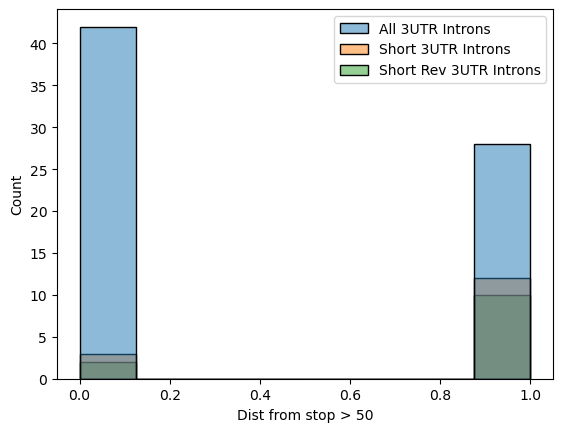

In [568]:
sns.histplot(x=list(rest_sub.dist_from_stop[rest_sub.Loc=='3UTR']>50)+list(short_sub.dist_from_stop[short_sub.Loc=='3UTR'] > 50)+list(short_sub_rev.dist_from_stop[short_sub_rev.Loc=='3UTR'] > 50),
            hue=['All 3UTR Introns']*np.sum([rest_sub.Loc=='3UTR']) + ['Short 3UTR Introns']*np.sum([short_sub.Loc=='3UTR'])+['Short Rev 3UTR Introns']*np.sum([short_sub_rev.Loc=='3UTR']))
plt.xlabel('Dist from stop > 50')
#_=plt.yscale('log')

<Axes: ylabel='Probability'>

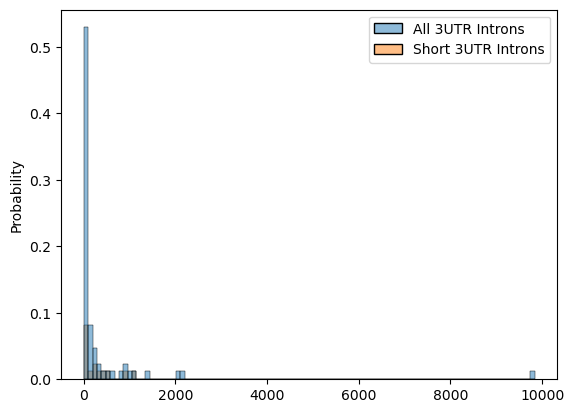

In [451]:
sns.histplot(x=list(rest_sub.dist_from_stop[rest_sub.Loc=='3UTR'])+list(short_sub.dist_from_stop[short_sub.Loc=='3UTR']),
            hue=['All 3UTR Introns']*np.sum([rest_sub.Loc=='3UTR']) + ['Short 3UTR Introns']*np.sum([short_sub.Loc=='3UTR']),
             stat='probability')
#_=plt.xscale('log')

SignificanceResult(statistic=np.float64(-0.062483047967398585), pvalue=np.float64(0.6073495955177741))
PearsonRResult(statistic=np.float64(-0.08604575641229056), pvalue=np.float64(0.4787818510731485))


Text(0, 0.5, 'Length')

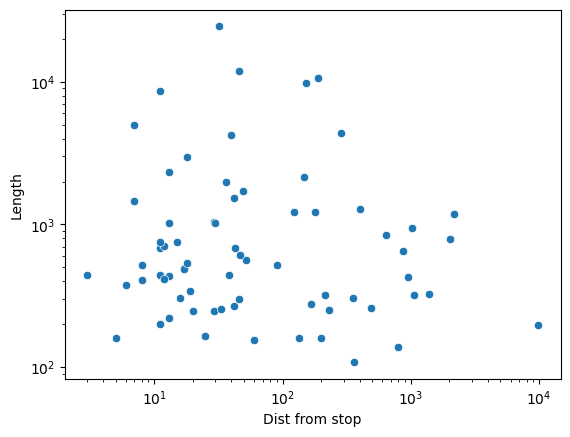

In [519]:
sns.scatterplot(x= list(rest_sub.dist_from_stop[rest_sub.Loc=='3UTR']),y=list(rest_sub.length[rest_sub.Loc=='3UTR']))
print(scipy.stats.spearmanr(list(np.log(rest_sub.dist_from_stop[rest_sub.Loc=='3UTR'])),list(np.log(rest_sub.length[rest_sub.Loc=='3UTR']))))
print(scipy.stats.pearsonr(list(np.log(rest_sub.dist_from_stop[rest_sub.Loc=='3UTR'])),list(np.log(rest_sub.length[rest_sub.Loc=='3UTR']))))
plt.loglog()
_=plt.xlabel('Dist from stop')
_=plt.ylabel('Length')

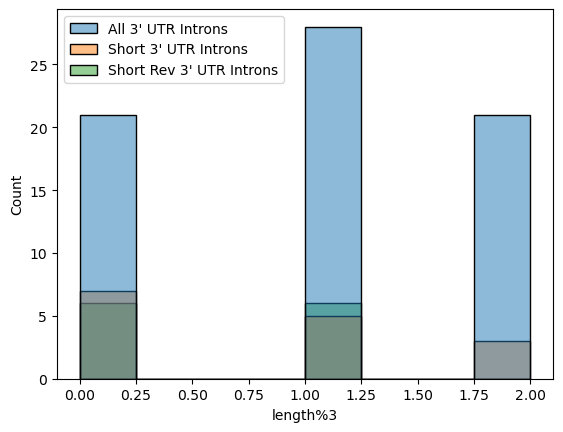

In [563]:
sns.histplot(x=list(rest_sub.length[rest_sub.Loc=='3UTR']%3)+list(short_sub.length[short_sub.Loc=='3UTR']%3)+list(short_sub_rev.length[short_sub_rev.Loc=='3UTR']%3),
            hue=["All 3' UTR Introns"]*np.sum([rest_sub.Loc=='3UTR']) + ["Short 3' UTR Introns"]*np.sum([short_sub.Loc=='3UTR'])+["Short Rev 3' UTR Introns"]*np.sum([short_sub_rev.Loc=='3UTR']))
#_=plt.yscale('log')
_=plt.xlabel('length%3')

In [529]:
np.sum(rest_sub.length[rest_sub.Loc=='3UTR']%3 == 0 )/(np.sum(rest_sub.Loc=='3UTR'))

np.float64(0.3)

In [530]:
np.sum(short_sub.length[short_sub.Loc=='3UTR']%3 == 0 )/(np.sum(short_sub.Loc=='3UTR'))

np.float64(0.4666666666666667)

In [565]:
np.sum(short_sub_rev.length[short_sub_rev.Loc=='3UTR']%3 == 0 )/(np.sum(short_sub_rev.Loc=='3UTR'))

np.float64(0.5)

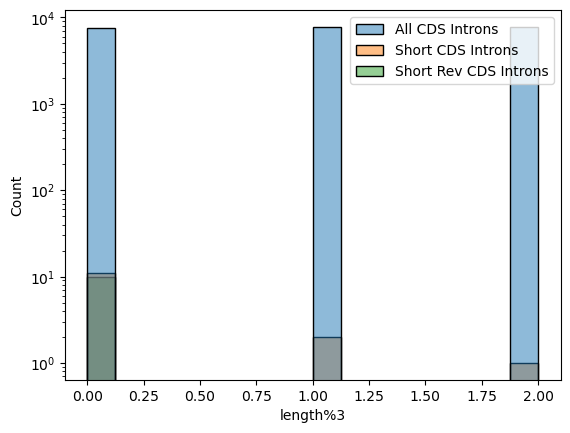

In [564]:
sns.histplot(x=list(rest_sub.length[rest_sub.Loc=='Exon-Coding']%3)+list(short_sub.length[short_sub.Loc=='Exon-Coding']%3)+list(short_sub_rev.length[short_sub_rev.Loc=='Exon-Coding']%3),
            hue=['All CDS Introns']*np.sum([rest_sub.Loc=='Exon-Coding']) + ['Short CDS Introns']*np.sum([short_sub.Loc=='Exon-Coding'])+ ['Short Rev CDS Introns']*np.sum([short_sub_rev.Loc=='Exon-Coding']))
_=plt.yscale('log')
_=plt.xlabel('length%3')

In [505]:
pd.Categorical(rest_sub.length[rest_sub.Loc=='Exon-Coding']%3).value_counts()

0    7494
1    7670
2    7747
Name: count, dtype: int64

In [507]:
pd.Categorical(short_sub.length[short_sub.Loc=='Exon-Coding']%3).value_counts()

0    11
1     2
2     1
Name: count, dtype: int64

In [566]:
pd.Categorical(short_sub_rev.length[short_sub_rev.Loc=='Exon-Coding']%3).value_counts()

0    10
Name: count, dtype: int64

In [508]:
print((7494/(7494+7670+7747))*100,'% in-frame all CDS')

32.70917899698835 % in-frame all CDS


In [509]:
print((11/(14))*100,'% in-frame all CDS')

78.57142857142857 % in-frame all CDS


In [567]:
print((10/(10))*100,'% in-frame all CDS')

100.0 % in-frame all CDS


In [464]:
#For transcripts in short, get exon sequence of similar length (argmin dist)
exon_rngs = []
int_rngs = []
for i in tqdm.tqdm(range(len(short_sub))):
    
    df = short_sub.iloc[i]
    c = df.Chr
    st = df.Start.astype(int)
    end = df.End.astype(int)
    trans = df.Transcript

    t_filt = [trans in i for i in gff3[8]]
    sub_gff3 = gff3[(gff3[2]=='exon') & t_filt] #(gff3[0]==c)
    ls = np.array(sub_gff3[4]-sub_gff3[3])
    which_exon = np.argmin(np.abs(ls-(end-st)))

    df2 = sub_gff3.iloc[which_exon]
    st_exon = df2[3]
    end_exon = df2[4]

    exon_rngs += [(c,st_exon,end_exon)]

    r_sub = rest_sub[rest_sub.Transcript == trans]
    if len(r_sub) > 0:
        r2 = r_sub.iloc[0]
        s = r2.Start
        e = r2.End

        l = e-s
        half = int(l/2)
        width = int((end-st)/2)

        if width < half:
            new_st = s+(half-width)
            new_end = s+(half+width)
            int_rngs += [(c,new_st,new_end)]

        

    


  0%|                                                                                                | 0/31 [00:00<?, ?it/s]/tmp/ipykernel_2965628/1679639331.py:13: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  sub_gff3 = gff3[(gff3[2]=='exon') & t_filt] #(gff3[0]==c)
  3%|██▊                                                                                     | 1/31 [00:00<00:03,  8.50it/s]/tmp/ipykernel_2965628/1679639331.py:13: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  sub_gff3 = gff3[(gff3[2]=='exon') & t_filt] #(gff3[0]==c)
/tmp/ipykernel_2965628/1679639331.py:13: FutureWarning: Logical ops (and, or, xor)

In [476]:
baselines = pd.DataFrame()
ls = exon_rngs+int_rngs
labs = ['Exon']*len(exon_rngs)+['Intron']*len(int_rngs)
chrs = []
sts = []
ends = []
lab = []

for i in range(len(ls)):
    chrs += [ls[i][0]]
    sts += [ls[i][1]]
    ends += [ls[i][2]]
    lab += [labs[i]]

baselines[0] = chrs
baselines[1] = sts
baselines[2] = ends
baselines[3] = lab
baselines.head()



,0,1,2,3
0,SckGQDu_13;HRSCAF=20,3769101,3769203,Exon
1,SckGQDu_17;HRSCAF=24,558407,558501,Exon
2,SckGQDu_17;HRSCAF=24,2061438,2061517,Exon
3,SckGQDu_17;HRSCAF=24,8315393,8315452,Exon
4,SckGQDu_17;HRSCAF=24,28825614,28825680,Exon


In [477]:
seqs = get_sj_seqs(baselines,st_minus=0,end_plus=1)
baselines['sequence'] =seqs  
baselines.head()


,0,1,2,3,sequence
0,SckGQDu_13;HRSCAF=20,3769101,3769203,Exon,TTTAAATTAGGTCAAATTTTTCTTACTGGAAGGCTGGGATTTTTTA...
1,SckGQDu_17;HRSCAF=24,558407,558501,Exon,TTATGATTATTCGACGTTGAGAGGAGGAAGCACTGGTATAGACATC...
2,SckGQDu_17;HRSCAF=24,2061438,2061517,Exon,AAGTGAGTGAAGAAGCAGGAGACTTTCTGTTGGATCTTATCGATTA...
3,SckGQDu_17;HRSCAF=24,8315393,8315452,Exon,AATTGGATGGTGCCATCATTTCAGGCAGAGATTTTGAATATAATTA...
4,SckGQDu_17;HRSCAF=24,28825614,28825680,Exon,GGGTCGTCTGAAGTCAGATTCCCAATCAATATCGGTATCACTGGAA...


In [478]:
peptide_file = open(r'baselines.fasta', 'w+')
out = '\n'.join(['>' + str(i+1) + "\n" + j for i,j in enumerate(list(baselines.sequence))])
peptide_file.write(out)
peptide_file.close()

In [479]:
!pwd

/home/tchari/spliceformats


In [516]:
baselines['length'] = baselines[2]-baselines[1]
baselines

,0,1,2,3,sequence,length
0,SckGQDu_13;HRSCAF=20,3769101,3769203,Exon,TTTAAATTAGGTCAAATTTTTCTTACTGGAAGGCTGGGATTTTTTA...,102
1,SckGQDu_17;HRSCAF=24,558407,558501,Exon,TTATGATTATTCGACGTTGAGAGGAGGAAGCACTGGTATAGACATC...,94
2,SckGQDu_17;HRSCAF=24,2061438,2061517,Exon,AAGTGAGTGAAGAAGCAGGAGACTTTCTGTTGGATCTTATCGATTA...,79
3,SckGQDu_17;HRSCAF=24,8315393,8315452,Exon,AATTGGATGGTGCCATCATTTCAGGCAGAGATTTTGAATATAATTA...,59
4,SckGQDu_17;HRSCAF=24,28825614,28825680,Exon,GGGTCGTCTGAAGTCAGATTCCCAATCAATATCGGTATCACTGGAA...,66
5,SckGQDu_17;HRSCAF=24,34104414,34104449,Exon,ACGAAAGCTTTGCTACAGACCAAAAAGTAAAAAAGG,35
6,SckGQDu_22;HRSCAF=46,3246360,3246393,Exon,ACGAGTTCGACTTGACGCCGCTGTATGTCGCCGG,33
7,SckGQDu_83;HRSCAF=119,10018026,10019308,Exon,AAGTCAAGTAACTTAACGTCACTTTTAGTTTATAATCACTAAATAA...,1282
8,SckGQDu_83;HRSCAF=119,24412199,24412222,Exon,TCACGGGCAAGAAGTTGATATAGG,23
9,SckGQDu_83;HRSCAF=119,25721101,25721280,Exon,TAGAGATGGACCTTATCGCAAACCCATGCCTTTGATGCTTCACATG...,179


In [360]:
#label as coding or 5' or 3' utr... 
#Define inds


In [ ]:
#Pass seqs to mfold

**All seq logo comparisons**

/tmp/ipykernel_2965628/1053824825.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chrom = sj_df.iloc[i][0]
/tmp/ipykernel_2965628/1053824825.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = sj_df.iloc[i][1]
/tmp/ipykernel_2965628/1053824825.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = sj_df.iloc[i][2]
/home/tchari/rmats_conda_env/lib/python3.10/site-packages/logomaker/src/matrix.py:270: FutureWarning: Set

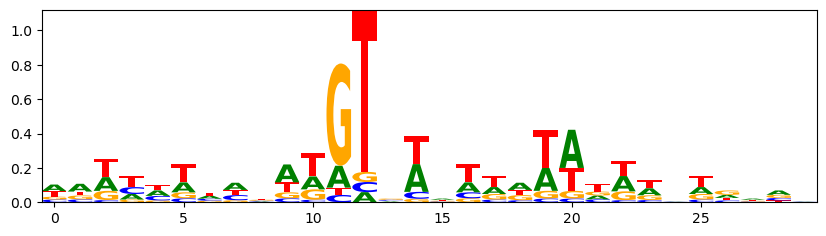

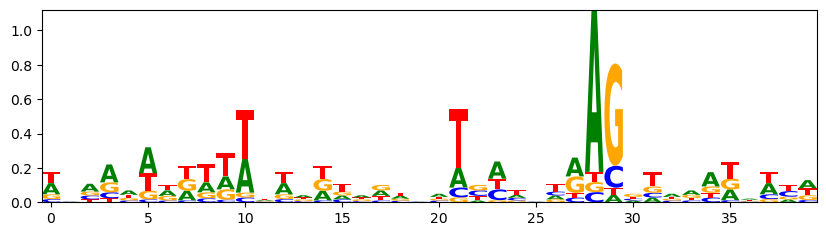

In [511]:

seqs = get_sj_seqs(short_sub[short_sub.Loc=='3UTR'],st_minus=12,end_plus=10)

counts_mat = lm.alignment_to_matrix([i[0:30]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

counts_mat = lm.alignment_to_matrix([i[-40:]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

In [515]:
np.unique(short_sub.Loc)

array(['3UTR', '5UTR', 'Exon-Coding'], dtype=object)

/tmp/ipykernel_2965628/1053824825.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chrom = sj_df.iloc[i][0]
/tmp/ipykernel_2965628/1053824825.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = sj_df.iloc[i][1]
/tmp/ipykernel_2965628/1053824825.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = sj_df.iloc[i][2]
/home/tchari/rmats_conda_env/lib/python3.10/site-packages/logomaker/src/matrix.py:270: FutureWarning: Set

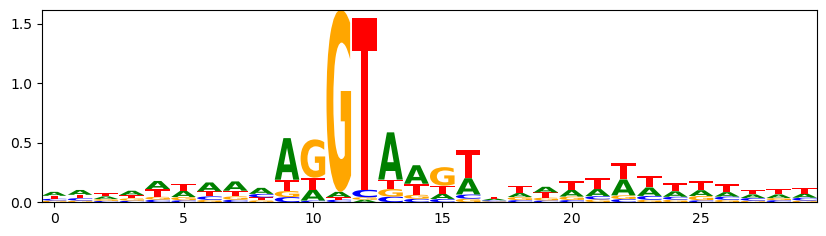

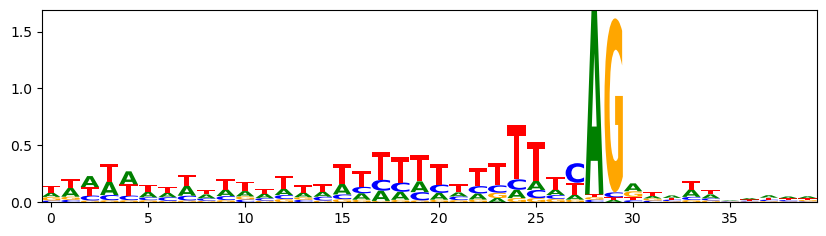

In [512]:

seqs = get_sj_seqs(rest_sub[rest_sub.Loc=='3UTR'],st_minus=12,end_plus=10)

counts_mat = lm.alignment_to_matrix([i[0:30]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

counts_mat = lm.alignment_to_matrix([i[-40:]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

/tmp/ipykernel_2965628/1053824825.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chrom = sj_df.iloc[i][0]
/tmp/ipykernel_2965628/1053824825.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = sj_df.iloc[i][1]
/tmp/ipykernel_2965628/1053824825.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = sj_df.iloc[i][2]
/home/tchari/rmats_conda_env/lib/python3.10/site-packages/logomaker/src/matrix.py:270: FutureWarning: Set

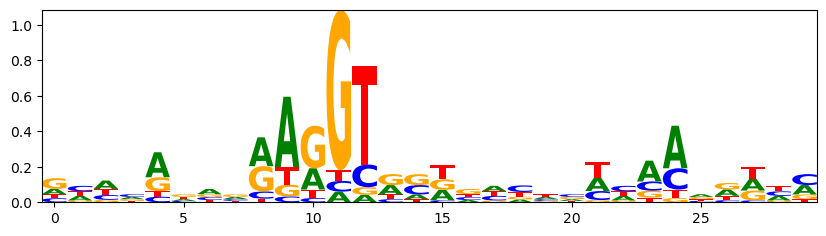

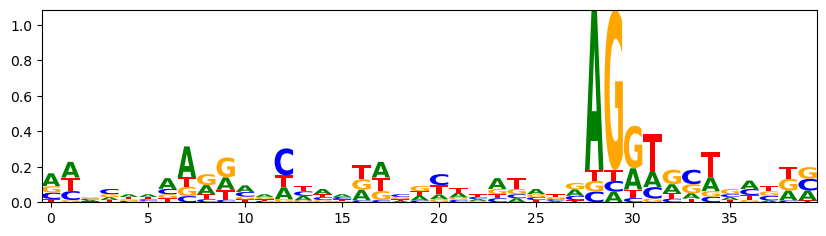

In [513]:

seqs = get_sj_seqs(short_sub[short_sub.Loc=='Exon-Coding'],st_minus=12,end_plus=10)

counts_mat = lm.alignment_to_matrix([i[0:30]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

counts_mat = lm.alignment_to_matrix([i[-40:]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

/tmp/ipykernel_2965628/1053824825.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chrom = sj_df.iloc[i][0]
/tmp/ipykernel_2965628/1053824825.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = sj_df.iloc[i][1]
/tmp/ipykernel_2965628/1053824825.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = sj_df.iloc[i][2]
/home/tchari/rmats_conda_env/lib/python3.10/site-packages/logomaker/src/matrix.py:270: FutureWarning: Set

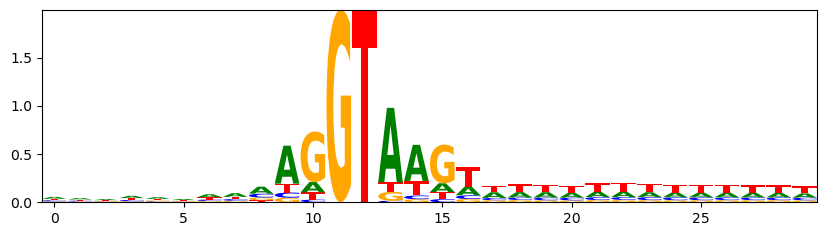

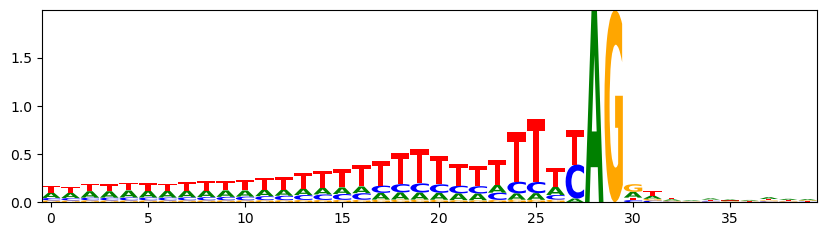

In [514]:

seqs = get_sj_seqs(rest_sub[rest_sub.Loc=='Exon-Coding'],st_minus=12,end_plus=10)

counts_mat = lm.alignment_to_matrix([i[0:30]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

counts_mat = lm.alignment_to_matrix([i[-40:]for i in seqs],to_type='information') #or [-60:-19]
lm.Logo(counts_mat,color_scheme='classic')

#### **Do the same for bulk**

In [459]:
#Validate that all juncs in inds, are in the introns_df

introns_bulk_seq_df = bulk_seq_df[bulk_seq_df.SJ_Type=='Ex_Ex']
real_intron_bulk = np.array([False]*len(introns_bulk_seq_df))
real_trans_bulk = np.array([None]*len(introns_bulk_seq_df))

#for each entry, subset introns_df for chr, while sum==0 or i<len(sub_intr_df) (sum += 1 if start>start_int and end<end_int, i+=1 (iloc))
for i in tqdm.tqdm(range(len(introns_bulk_seq_df)),desc='Real Introns Bulk'):
    sub = introns_bulk_seq_df.iloc[i]
    chrs = sub.Chr
    st = sub.Start
    end = sub.End

    sub_intron_df = intron_df[intron_df.Chr==chrs]
    sums = 0
    inc = 0

    if (len(sub_intron_df) > 0):
        while ((sums==0) and (inc<len(sub_intron_df))):
            sub_df = sub_intron_df.iloc[inc]
            st_int = sub_df.Start
            end_int = sub_df.End
            trans_int = sub_df.Transcript
            
            if ((st==(st_int+1)) and (end==(end_int-1))):
                sums +=1 
                real_trans_bulk[i] = trans_int
                
            inc += 1
            
        real_intron_bulk[i] = (sums!=0)
        
      
real_introns_bulk_df = introns_bulk_seq_df[real_intron_bulk]
real_introns_bulk_df['Transcript'] = real_trans_bulk[real_intron_bulk]
#check if original inds selected remain

Real Introns Bulk:  40%|███████████████████████▍                                  | 14582/36065 [1:35:10<2:40:05,  2.24it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [460]:
real_introns_bulk_df.to_csv('real_introns_bulk_seq.csv',index=None)

In [461]:
real_introns_bulk_df = pd.read_csv('real_introns_bulk_seq.csv')
real_introns_bulk_df.head()

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,St_End_Recurs,Short_Intron,AGGT_Dists,length,Transcript
0,SckGQDu_9;HRSCAF=16,426716,427189,CCGATGTAAAGGTATAATCAATTGATATTTT,AATTTAATCAAGACTATCTTTCTCTTTCAGGCCTATATGGA,Ex_Ex,GT/AG,False,False,NaN,474,MSTRG.24540.1.p1
1,SckGQDu_9;HRSCAF=16,427296,428266,CGCAATCACAGGTAATAATTTGCACCAGGAA,TCTTTCAGCTATCTTGCTATCGTTTTTCAGGTCAGCTTGAC,Ex_Ex,GT/AG,False,False,NaN,971,MSTRG.24540.1.p1
2,SckGQDu_9;HRSCAF=16,428410,428625,AGAAGGGCGAGGTACATTCCTTTTTTTAAGC,ATTTTATCTTCTTTTTTTTAATTCTTCTAGATGACGCTTCG,Ex_Ex,GT/AG,False,False,NaN,216,MSTRG.24540.1.p1
3,SckGQDu_9;HRSCAF=16,428903,429146,GTCTAACAAAGGTAAGGTGTTAGTGGCATTA,AAATCTGACGTCCTGGTTTCCATATTGCAGGTCTTTCTGGT,Ex_Ex,GT/AG,False,False,NaN,244,MSTRG.24540.1.p1
4,SckGQDu_9;HRSCAF=16,429255,429686,ACACTCTTTAGGTAAGCCTATTTCTTGTGTA,TCATTACACAAACTACTCTTTTCTTTGCAGGATTGGCTCAC,Ex_Ex,GT/AG,False,False,NaN,432,MSTRG.24540.1.p1


In [462]:
len(real_introns_bulk_df)

35865

In [205]:
#Make strs and find overlaps of bulk and single-cell
def make_str(sj,cols=[0,1,2]):
    '''
    Make string name list for all SJs in STAR dataframe
    '''
    strs = []
    for i in range(len(sj)):
        sub = sj.iloc[i]
        genom = sub[cols[0]]
        s = sub[cols[1]]
        e = sub[cols[2]]
        strs += ['_'.join([genom,str(s),str(e)])]

    return strs

    
short_less80 = make_str(test[test.length<80],cols=['Chr','Start','End'] )

bulk_less80 = make_str(real_introns_bulk_df[real_introns_bulk_df.length<80],cols=['Chr','Start','End'] )




In [211]:
np.sum([i in short_less80 for i in bulk_less80])/len(bulk_less80)

np.float64(0.3611111111111111)

In [283]:
sub = real_introns_bulk_df[real_introns_bulk_df.length<80]
valid_cats = []
for i in range(len(sub)):
    found_3 = False
    found_5 = False
    
    df = sub.iloc[i]
    c = df.Chr
    st = df.Start.astype(int)
    end = df.End.astype(int)
    
    sub_gff3 = gff3[(gff3[2]=='three_prime_UTR') & (gff3[0]==c)]

    if len(sub_gff3) > 0:
        for j in range(len(sub_gff3)):
            gf = sub_gff3.iloc[j]
            st_2 = gf[3].astype(int)
            end_2 = gf[4].astype(int)
    
            if (st_2<st) & (end_2>end):
                valid_cats += ['3UTR']
                found_3 = True
                break
                
    if not found_3:
        sub_gff3 = gff3[(gff3[2]=='five_prime_UTR') & (gff3[0]==c)]
        if len(sub_gff3) > 0:
            for j in range(len(sub_gff3)):
                gf = sub_gff3.iloc[j]
                st_2 = gf[3].astype(int)
                end_2 = gf[4].astype(int)
        
                if (st_2<st) & (end_2>end):
                    valid_cats += ['5UTR']
                    found_5 = True
                    break

    if ((not found_3) and (not found_5)):
        valid_cats += ['Coding']

    

sub['Loc'] =   valid_cats

/tmp/ipykernel_2965628/2369930080.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Loc'] =   valid_cats


In [284]:
sub

,Chr,Start,End,5_SS,3_SS,SJ_Type,SJ_Motif,St_End_Recurs,Short_Intron,AGGT_Dists,length,Loc
3938,SckGQDu_17;HRSCAF=24,557302,557378,GAATAGCTGTGGTATGTTTTTTTTCTTTTTT,AAATTTATGTCACATGTGTTTGTTTTTAAGGAACTGGTAAA,Ex_Ex,GT/AG,False,False,NaN,76,Coding
4288,SckGQDu_17;HRSCAF=24,2062883,2062961,AACTATTAAAGGTAAGAAATTACAGTTCTAC,TTGTAATTTTTATTGTTTTATATTTGATAGCTTCGAAGGTA,Ex_Ex,GT/AG,False,False,NaN,78,Coding
4569,SckGQDu_17;HRSCAF=24,3408385,3408411,CTACAGAAGAAGTAGCTCCAGCACCAGCTAG,GAAGTAGCTCCAGCACCAGCTAGTGAAGAGGCAGCCCCAGC,Ex_Ex,GT/AG,False,True,NaN,26,5UTR
4578,SckGQDu_17;HRSCAF=24,3413497,3413556,CTGTCCCTGAGGTCGAGGCCACACCAGAGGT,GTCGAAGCAGTGCCGGAAGCTGTCCCTGAGGTCGAAGCCAC,Ex_Ex,GT/AG,False,False,NaN,59,3UTR
4580,SckGQDu_17;HRSCAF=24,3413755,3413814,CAGTACCAGAAGTTGTCCCTGAAGTCAAAAC,GCTGTACCTGAGGTCAAAGCGACCCTAGAGGTTGTCCCTGA,Ex_Ex,GT/AG,False,False,NaN,59,Coding
4582,SckGQDu_17;HRSCAF=24,3413995,3414024,CAACCCCAGAGGTTGTCCCTGAAGTCGAAGC,GTTGTCCCTGAAGTCGAAGCCACACCAGAGGTTGTCCCTGA,Ex_Ex,GT/AG,True,True,NaN,29,3UTR
8150,SckGQDu_17;HRSCAF=24,32307093,32307113,GGTGGCCTCGGGTTGTTCTGTGGTGGCCTCA,TGGCCTCGGGTTGTTCTGTGGTGGCCTCAGGTTGTTCTGTG,Ex_Ex,GT/AG,False,True,NaN,20,Coding
8457,SckGQDu_17;HRSCAF=24,34107220,34107243,TAATATACACTATCTTAGATTATTTTTGAAA,TACACTATCTTAGATTATTTTTGAAATAACCTAGATTCCAA,Ex_Ex,AT/AC,False,True,NaN,23,Coding
8772,SckGQDu_22;HRSCAF=46,383166,383198,TCGTCGAGGAAGTTGCTGCTGAAACTGAAGC,GCTGCTGAAACTGAAGCTGTTGTCGAGGAGGTAGCTGCTGA,Ex_Ex,GT/AG,False,True,NaN,32,Coding
8787,SckGQDu_22;HRSCAF=46,900625,900657,TCGTCGAGGAAGTTGTTGCCGAAACTGAAGC,GTTGCCGAAACTGAAGCCATCGTCGAGGAGGCTGCTGCTGA,Ex_Ex,GT/AG,False,True,NaN,32,Coding


In [293]:
# np.sum([(i%3==0) for i in [77,79,60,21,24,33,33,33,66,33,30,42,30,27,54,27,33,36,76,79,37,72,72,63,72,36,41,80,54,46]])/len([77,79,60,21,24,33,33,33,66,33,30,42,30,27,54,27,33,36,76,79,37,72,72,63,72,36,41,80,54,46])
# #0.73

In [491]:
gff3[['MSTRG.25625' in i for i in gff3[8]]]

,0,1,2,3,4,5,6,7,8
